# **Google Drive**

In [ ]:
# Mount Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **R Magic**

In [ ]:
# Downgrade rpy:
!pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314932 sha256=7e3904eb62372f140bc18c8af45f0bf259239f6d2036dd5aebbff0d0a2d232d0
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [ ]:
# Activate R magic:
%load_ext rpy2.ipython

# **Packages**

In [ ]:
# Install and load igraph:
!pip install igraph

In [ ]:
%%R
# Install and load dplyr:
install.packages("dplyr")
library(dplyr)

In [ ]:
%%R
# Install and load BiocManager:
install.packages("BiocManager")
library(BiocManager)

In [ ]:
%%R
# Install and load biomaRt:
BiocManager::install("biomaRt")
library(biomaRt)

In [ ]:
%%R
# Install and load readxl:
install.packages("readxl")
library(readxl)

In [ ]:
%%R
# Install and load igraph:
install.packages("igraph")
library(igraph)

In [ ]:
%%R
# Install and load visNetwork:
install.packages("visNetwork")
library(visNetwork)

In [ ]:
%%R
# Install and load the httr package:
install.packages("httr")
library(httr)

In [ ]:
%%R
# Install and load the jsonlite package:
install.packages("jsonlite")
library(jsonlite)

In [ ]:
%%R
# Install and load VennDiagram:
install.packages("VennDiagram")
library(VennDiagram)

In [ ]:
%%R
# Install and load RColorBrewer:
install.packages("RColorBrewer")
library(RColorBrewer)

# **Data Preprocessing**

**References:**

**Datasets:**

- **Synapse:** https://www.synapse.org/#!Synapse:syn35874390/wiki/618989

- **GEO:** https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE215865

- **Paper:** https://www.nature.com/articles/s41591-022-02107-4

**Code:**

https://github.com/DarwinAwardWinner/NGSCheckMate

https://github.com/DarwinAwardWinner/rctutils

<img src="https://drive.google.com/uc?export=view&id=1VKIDCz-zqMuk4KT5PwYhR9mcaPGxRtol" alt="drawing" width="300"/>

---

`dim(unique(PASC_case_data))`

`[1] 58884   414`

---

`dim(unique(Positive_Acute_COVID_control_subset))`

`[1] 58884   687`

---

`dim(unique(Negative_Acute_COVID_control_subset))`

`[1] 58884   187`

---

`dim(unique(Unknown_Acute_COVID_control_subset))`

`[1] 58884   112`



In [ ]:
%%R

# CLINICAL DATA FILE PRE_PROCESS:

# Open the clinical data file:
clinical_data <- read.csv("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/original_clinical_data_table.csv", header = TRUE)

# Check the dimension and print the first rows:
print(dim(clinical_data))
print(head(clinical_data))

# Create a COVID_status column to separate the acute COVID from the PASC cases:
clinical_data <- clinical_data %>%
  # Use rowwise to work with each row individually:
  dplyr::rowwise() %>%
  # Create a new column COVID_Status:
  dplyr::mutate(COVID_Status = dplyr::case_when(
    # Check if any of the Post_COVID19_Symptom_ columns have a TRUE value:
    any(dplyr::c_across(starts_with("Post_COVID19_Symptom_")) == TRUE) ~ "PASC_case",
    # Check if none of the Post_COVID19_Symptom_ columns have a TRUE or NA value and Patient_Classification_At_First_Sample starts with SARS-CoV-2_Positive:
    all(dplyr::c_across(starts_with("Post_COVID19_Symptom_")) %in% c(FALSE, NA)) &
      startsWith(Patient_Classification_At_First_Sample, "SARS-CoV-2_Positive") ~ "Positive_Acute_COVID_control",
    # Check if none of the Post_COVID19_Symptom_ columns have a TRUE or NA value and Patient_Classification_At_First_Sample starts with SARS-CoV-2_Negative:
    all(dplyr::c_across(starts_with("Post_COVID19_Symptom_")) %in% c(FALSE, NA)) &
      startsWith(Patient_Classification_At_First_Sample, "SARS-CoV-2_Negative") ~ "Negative_Acute_COVID_control",
    # Check if none of the Post_COVID19_Symptom_ columns have a TRUE or NA value and Patient_Classification_At_First_Sample starts with SARS-CoV-2_Unknown:
    all(dplyr::c_across(starts_with("Post_COVID19_Symptom_")) %in% c(FALSE, NA)) &
      startsWith(Patient_Classification_At_First_Sample, "SARS-CoV-2_Unknown") ~ "Unknown_Acute_COVID_control",
    # Default case:
    TRUE ~ NA_character_
  )) %>%
  # Reset the grouping:
  dplyr::ungroup() %>%
  # Reorder columns to place COVID_Status after Subject_ID:
  dplyr::select(Subject_ID, COVID_Status, everything())

# Check the dimension and print the first rows:
print(dim(clinical_data))
print(head(clinical_data))

# Check the unique values of some columns:
print(lapply(clinical_data[, 2:5], unique))

# Check the frequency of each value in the COVID_status column:
print(table(clinical_data$COVID_Status, useNA="always"))

# Save the output:
write.table(clinical_data, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/clinical_data_modified.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

[1] 10613   228
     Subject_ID Age    Sex         Race_From_Consent Ethnicity_From_Consent
1 Subj_79214360  84   Male Black or African American NOT Hispanic or Latino
2 Subj_24e7ccf4  58   Male        More Than One Race     Hispanic or Latino
3 Subj_0087882b  46   Male Black or African American NOT Hispanic or Latino
4 Subj_67573a91  60 Female                     Asian NOT Hispanic or Latino
5 Subj_33ab3911  43   Male                     White     Hispanic or Latino
6 Subj_33ab3911  43   Male                     White     Hispanic or Latino
    Blood_Sample_ID Days_Since_First_Sample COVID19_Within_Encounter
1 Subj_79214360BAL1                       0                       NA
2 Subj_24e7ccf4BAL1                       0                       NA
3 Subj_0087882bBAL1                       0                       NA
4 Subj_67573a91BAL1                       0                       NA
5 Subj_33ab3911BAL1                       0                     TRUE
6              <NA>                   

In [ ]:
%%R

# GSE_215865 FILE PRE-PROCESS: SUBJECT ID - PROTEIN CODING-GENES

############################# OPEN THE INPUT DATA: #############################

# Open the gene expression matrix file:
gse_215865 <- read.csv("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/GSE215865_normalised_matrix.csv", header = TRUE)

# Open the clinical data file:
clinical_data <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/clinical_data_modified.txt", header = TRUE, sep="\t")

# Check the dimension and print the first 5 rows and columns:
print("Original dataset:")
print(dim(gse_215865))
print(gse_215865[1:5, 1:5])

# Print the first few IDs from clinical_data to check their format:
print(head(clinical_data$Subject_ID))

################################## HANDLE NAs: #################################

# Check for columns and rows where all values are NA:
na_columns_before <- colSums(is.na(gse_215865)) == nrow(gse_215865)
na_rows_before <- rowSums(is.na(gse_215865[, -1])) == (ncol(gse_215865) - 1)

# Count the number of columns and rows with all NA values except the first column (before deletion):
num_rows_all_na_except_first_before <- sum(na_rows_before)
num_columns_all_na_except_first_before <- sum(na_columns_before)

# Exclude columns and rows with only NA values:
gse_215865 <- gse_215865[, !na_columns_before]
gse_215865 <- gse_215865[!na_rows_before, ]

# Recalculate the counts after deletion:
na_columns_after <- colSums(is.na(gse_215865)) == nrow(gse_215865)
na_rows_after <- rowSums(is.na(gse_215865[, -1])) == (ncol(gse_215865) - 1)
num_rows_all_na_except_first_after <- sum(na_rows_after)
num_columns_all_na_except_first_after <- sum(na_columns_after)

# Print the count of columns and rows with NAs in all the samples (before and after deletion):
print(paste("Columns with NAs in all the samples before deleting them:", num_columns_all_na_except_first_before))
print(paste("Rows with NAs in all the samples before deleting them:", num_rows_all_na_except_first_before))

print(paste("Columns with NAs in all the samples after deleting them:", num_columns_all_na_except_first_after))
print(paste("Rows with NAs in all the samples after deleting them:", num_rows_all_na_except_first_after))

############################# SUBJECT + SAMPLE IDs: ############################

# Modify column names:
colnames(gse_215865) <- gsub("T[0-9]{1,2}[A-B]?_Plate_[0-9]+$", "", colnames(gse_215865))

################################### SUBSETS: ###################################

# Create subsets based on the COVID_Status values:

# Subset 1: PASC_case:
PASC_case_ids <- clinical_data$Subject_ID[clinical_data$COVID_Status == "PASC_case"]
PASC_case_subset <- gse_215865[, c("Ensembl_Gene_ID", colnames(gse_215865)[colnames(gse_215865) %in% PASC_case_ids])]

# Subset 2: Positive_Acute_COVID_control:
Positive_Acute_COVID_control_ids <- clinical_data$Subject_ID[clinical_data$COVID_Status == "Positive_Acute_COVID_control"]
Positive_Acute_COVID_control_subset <- gse_215865[, c("Ensembl_Gene_ID", colnames(gse_215865)[colnames(gse_215865) %in% Positive_Acute_COVID_control_ids])]

# Subset 3: Negative_Acute_COVID_control:
Negative_Acute_COVID_control_ids <- clinical_data$Subject_ID[clinical_data$COVID_Status == "Negative_Acute_COVID_control"]
Negative_Acute_COVID_control_subset <- gse_215865[, c("Ensembl_Gene_ID", colnames(gse_215865)[colnames(gse_215865) %in% Negative_Acute_COVID_control_ids])]

# Subset 4: Unknown_Acute_COVID_control:
Unknown_Acute_COVID_control_ids <- clinical_data$Subject_ID[clinical_data$COVID_Status == "Unknown_Acute_COVID_control"]
Unknown_Acute_COVID_control_subset <- gse_215865[, c("Ensembl_Gene_ID", colnames(gse_215865)[colnames(gse_215865) %in% Unknown_Acute_COVID_control_ids])]

############################### GENE ID VERSION: ###############################

# Remove the gene ID version:
PASC_case_subset$Ensembl_Gene_ID <- gsub("\\..*", "", PASC_case_subset$Ensembl_Gene_ID)
Positive_Acute_COVID_control_subset$Ensembl_Gene_ID <- gsub("\\..*", "", Positive_Acute_COVID_control_subset$Ensembl_Gene_ID)
Negative_Acute_COVID_control_subset$Ensembl_Gene_ID <- gsub("\\..*", "", Negative_Acute_COVID_control_subset$Ensembl_Gene_ID)
Unknown_Acute_COVID_control_subset$Ensembl_Gene_ID <- gsub("\\..*", "", Unknown_Acute_COVID_control_subset$Ensembl_Gene_ID)

################################## GENE NAME: ##################################

# Select the Mart and Dataset:
ensembl_mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

# Fetch the Mapping Data:
gene_reference <- getBM(attributes = c('ensembl_gene_id', 'external_gene_name', 'gene_biotype'), mart = ensembl_mart)

# Merge with each subset data frames and add Gene_Type:
add_gene_type <- function(subset) {
  merged_subset <- merge(subset, gene_reference, by.x="Ensembl_Gene_ID", by.y="ensembl_gene_id", all.x=TRUE)
  colnames(merged_subset)[which(colnames(merged_subset) == "external_gene_name")] <- "Gene_Symbol"
  colnames(merged_subset)[which(colnames(merged_subset) == "gene_biotype")] <- "Gene_Type"
  return(merged_subset)
}

PASC_case_subset <- add_gene_type(PASC_case_subset)
Positive_Acute_COVID_control_subset <- add_gene_type(Positive_Acute_COVID_control_subset)
Negative_Acute_COVID_control_subset <- add_gene_type(Negative_Acute_COVID_control_subset)
Unknown_Acute_COVID_control_subset <- add_gene_type(Unknown_Acute_COVID_control_subset)

# Reorder the columns:
reorder_columns <- function(subset) {
  dplyr::select(subset, Ensembl_Gene_ID, Gene_Symbol, Gene_Type, everything())
}

PASC_case_subset <- reorder_columns(PASC_case_subset)
Positive_Acute_COVID_control_subset <- reorder_columns(Positive_Acute_COVID_control_subset)
Negative_Acute_COVID_control_subset <- reorder_columns(Negative_Acute_COVID_control_subset)
Unknown_Acute_COVID_control_subset <- reorder_columns(Unknown_Acute_COVID_control_subset)

############################ PROTEIN-CODING GENES: ############################

# Function to filter for protein-coding genes:
filter_protein_coding <- function(subset) {
  subset %>% filter(Gene_Type == "protein_coding")
}

# Apply the filter to each subset:
PASC_case_subset <- filter_protein_coding(PASC_case_subset)
Positive_Acute_COVID_control_subset <- filter_protein_coding(Positive_Acute_COVID_control_subset)
Negative_Acute_COVID_control_subset <- filter_protein_coding(Negative_Acute_COVID_control_subset)
Unknown_Acute_COVID_control_subset <- filter_protein_coding(Unknown_Acute_COVID_control_subset)

################################ PRINT RESULTS: ################################

# Check the dimension and print the first 5 rows and columns of each subset:
print("PASC dataset:")
print(dim(PASC_case_subset))
print(PASC_case_subset[1:5, 1:5])

print("Positive Acute COVID Control Subset:")
print(dim(Positive_Acute_COVID_control_subset))
print(Positive_Acute_COVID_control_subset[1:5, 1:5])

print("Negative Acute COVID Control Subset:")
print(dim(Negative_Acute_COVID_control_subset))
print(Negative_Acute_COVID_control_subset[1:5, 1:5])

print("Unknown Acute COVID Control Subset:")
print(dim(Unknown_Acute_COVID_control_subset))
print(Unknown_Acute_COVID_control_subset[1:5, 1:5])

################################ EXPORT RESULTS: ################################

# Save each subset as different files:
write.table(PASC_case_subset, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/PASC_case_subset_subjects_pcgenes.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
write.table(Positive_Acute_COVID_control_subset, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_Control1/Positive_Acute_COVID_control_subset_subjects_pcgenes.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
write.table(Negative_Acute_COVID_control_subset, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_Control2/Negative_Acute_COVID_control_subset_subjects_pcgenes.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
write.table(Unknown_Acute_COVID_control_subset, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/Unknown_Acute_COVID_control_subset_subjects_pcgenes.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

[1] "Original dataset:"
[1] 58929  1393
    Ensembl_Gene_ID Subj_16ae238fT0_Plate_2 Subj_99de72fcT0_Plate_2
1 ENSG00000223972.5                      NA                      NA
2 ENSG00000227232.5                      NA               1.4151634
3 ENSG00000278267.1                      NA              -0.6689185
4 ENSG00000243485.5                      NA                      NA
5 ENSG00000284332.1                      NA                      NA
  Subj_4b09fa79T4_Plate_2 Subj_d4a362f0T1_Plate_2
1                      NA                      NA
2               1.4990040               1.7061731
3              -0.8579329               0.2285547
4                      NA                      NA
5                      NA                      NA
[1] "Subj_79214360" "Subj_24e7ccf4" "Subj_0087882b" "Subj_67573a91"
[5] "Subj_33ab3911" "Subj_33ab3911"
[1] "Columns with NAs in all the samples before deleting them: 197"
[1] "Rows with NAs in all the samples before deleting them: 37735"
[1] "Columns 

In [ ]:
%%R

# GSE_215865 FILE PRE-PROCESS: SUBJECT ID + SAMPLE ID - PROTEIN CODING-GENES

############################# OPEN THE INPUT DATA: #############################

# Open the gene expression matrix file:
gse_215865 <- read.csv("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/GSE215865_normalised_matrix.csv", header = TRUE)

# Open the clinical data file:
clinical_data <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/clinical_data_modified.txt", header = TRUE, sep="\t")

# Check the dimension and print the first 5 rows and columns:
print("Original dataset:")
print(dim(gse_215865))
print(gse_215865[1:5, 1:5])

################################## HANDLE NAs: #################################

# Check for columns and rows where all values are NA:
na_columns_before <- colSums(is.na(gse_215865)) == nrow(gse_215865)
na_rows_before <- rowSums(is.na(gse_215865[, -1])) == (ncol(gse_215865) - 1)

# Count the number of columns and rows with all NA values except the first column (before deletion):
num_rows_all_na_except_first_before <- sum(na_rows_before)
num_columns_all_na_except_first_before <- sum(na_columns_before)

# Exclude columns and rows with only NA values:
gse_215865 <- gse_215865[, !na_columns_before]
gse_215865 <- gse_215865[!na_rows_before, ]

# Recalculate the counts after deletion:
na_columns_after <- colSums(is.na(gse_215865)) == nrow(gse_215865)
na_rows_after <- rowSums(is.na(gse_215865[, -1])) == (ncol(gse_215865) - 1)
num_rows_all_na_except_first_after <- sum(na_rows_after)
num_columns_all_na_except_first_after <- sum(na_columns_after)

# Print the count of columns and rows with NAs in all the samples (before and after deletion):
print(paste("Columns with NAs in all the samples before deleting them:", num_columns_all_na_except_first_before))
print(paste("Rows with NAs in all the samples before deleting them:", num_rows_all_na_except_first_before))

print(paste("Columns with NAs in all the samples after deleting them:", num_columns_all_na_except_first_after))
print(paste("Rows with NAs in all the samples after deleting them:", num_rows_all_na_except_first_after))

# Extract subject IDs from column names (up to before the 'T'):
extracted_subject_ids <- gsub("T.*", "", colnames(gse_215865)[-1]) # Exclude the first column (Ensembl_Gene_ID)

# Correctly add these extracted IDs as a new column in gse_215865:

# Use rep() to repeat NA to match the number of rows in gse_215865:
gse_215865$Extracted_Subject_ID <- rep(NA, nrow(gse_215865))

# Assigning the extracted IDs to the relevant columns:
gse_215865$Extracted_Subject_ID[2:ncol(gse_215865)] <- extracted_subject_ids

################################### SUBSETS: ###################################

# Function to create subsets while ensuring dataframe structure is maintained:
create_subset <- function(main_data, case_ids) {

  # Adjust the way columns are selected to account for the new Extracted_Subject_ID column:
  subset_cols <- c("Ensembl_Gene_ID", colnames(main_data)[which(main_data$Extracted_Subject_ID %in% case_ids)])
  return(main_data[, subset_cols, drop = FALSE])
}

# Creating subsets using the new function:

# Subset 1: PASC_case:
PASC_case_subset <- create_subset(gse_215865, clinical_data$Subject_ID[clinical_data$COVID_Status == "PASC_case"])

# Subset 2: Positive_Acute_COVID_control:
Positive_Acute_COVID_control_subset <- create_subset(gse_215865, clinical_data$Subject_ID[clinical_data$COVID_Status == "Positive_Acute_COVID_control"])

# Subset 3: Negative_Acute_COVID_control:
Negative_Acute_COVID_control_subset <- create_subset(gse_215865, clinical_data$Subject_ID[clinical_data$COVID_Status == "Negative_Acute_COVID_control"])

# Subset 4: Unknown_Acute_COVID_control:
Unknown_Acute_COVID_control_subset <- create_subset(gse_215865, clinical_data$Subject_ID[clinical_data$COVID_Status == "Unknown_Acute_COVID_control"])

############################### GENE ID VERSION: ###############################

# Remove the gene ID version:
PASC_case_subset$Ensembl_Gene_ID <- gsub("\\..*", "", PASC_case_subset$Ensembl_Gene_ID)
Positive_Acute_COVID_control_subset$Ensembl_Gene_ID <- gsub("\\..*", "", Positive_Acute_COVID_control_subset$Ensembl_Gene_ID)
Negative_Acute_COVID_control_subset$Ensembl_Gene_ID <- gsub("\\..*", "", Negative_Acute_COVID_control_subset$Ensembl_Gene_ID)
Unknown_Acute_COVID_control_subset$Ensembl_Gene_ID <- gsub("\\..*", "", Unknown_Acute_COVID_control_subset$Ensembl_Gene_ID)

################################## GENE NAME: ##################################

# Select the Mart and Dataset:
ensembl_mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

# Fetch the Mapping Data:
gene_reference <- getBM(attributes = c('ensembl_gene_id', 'external_gene_name', 'gene_biotype'), mart = ensembl_mart)

# Merge with each subset data frames and add Gene_Type:
add_gene_type <- function(subset) {
  merged_subset <- merge(subset, gene_reference, by.x="Ensembl_Gene_ID", by.y="ensembl_gene_id", all.x=TRUE)
  colnames(merged_subset)[which(colnames(merged_subset) == "external_gene_name")] <- "Gene_Symbol"
  colnames(merged_subset)[which(colnames(merged_subset) == "gene_biotype")] <- "Gene_Type"
  return(merged_subset)
}

PASC_case_subset <- add_gene_type(PASC_case_subset)
Positive_Acute_COVID_control_subset <- add_gene_type(Positive_Acute_COVID_control_subset)
Negative_Acute_COVID_control_subset <- add_gene_type(Negative_Acute_COVID_control_subset)
Unknown_Acute_COVID_control_subset <- add_gene_type(Unknown_Acute_COVID_control_subset)

# Reorder the columns:
reorder_columns <- function(subset) {
  dplyr::select(subset, Ensembl_Gene_ID, Gene_Symbol, Gene_Type, everything())
}

PASC_case_subset <- reorder_columns(PASC_case_subset)
Positive_Acute_COVID_control_subset <- reorder_columns(Positive_Acute_COVID_control_subset)
Negative_Acute_COVID_control_subset <- reorder_columns(Negative_Acute_COVID_control_subset)
Unknown_Acute_COVID_control_subset <- reorder_columns(Unknown_Acute_COVID_control_subset)

############################ PROTEIN-CODING GENES: ############################

# Function to filter for protein-coding genes:
filter_protein_coding <- function(subset) {
  subset %>% filter(Gene_Type == "protein_coding")
}

# Apply the filter to each subset:
PASC_case_subset <- filter_protein_coding(PASC_case_subset)
Positive_Acute_COVID_control_subset <- filter_protein_coding(Positive_Acute_COVID_control_subset)
Negative_Acute_COVID_control_subset <- filter_protein_coding(Negative_Acute_COVID_control_subset)
Unknown_Acute_COVID_control_subset <- filter_protein_coding(Unknown_Acute_COVID_control_subset)

################################ PRINT RESULTS: ################################

# Check the dimension and print the first 5 rows and columns of each subset:
print("PASC dataset:")
print(dim(PASC_case_subset))
print(PASC_case_subset[1:5, 1:5])

print("Positive Acute COVID Control Subset:")
print(dim(Positive_Acute_COVID_control_subset))
print(Positive_Acute_COVID_control_subset[1:5, 1:5])

print("Negative Acute COVID Control Subset:")
print(dim(Negative_Acute_COVID_control_subset))
print(Negative_Acute_COVID_control_subset[1:5, 1:5])

print("Unknown Acute COVID Control Subset:")
print(dim(Unknown_Acute_COVID_control_subset))
print(Unknown_Acute_COVID_control_subset[1:5, 1:5])

################################ EXPORT RESULTS: ################################

# Save each subset as different files:
write.table(PASC_case_subset, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/PASC_case_subset_subjects_samples_pcgenes.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
write.table(Positive_Acute_COVID_control_subset, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_Control1/Positive_Acute_COVID_control_subset_subjects_samples_pcgenes.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
write.table(Negative_Acute_COVID_control_subset, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_Control2/Negative_Acute_COVID_control_subset_subjects_samples_pcgenes.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
write.table(Unknown_Acute_COVID_control_subset, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/Unknown_Acute_COVID_control_subset_subjects_samples_pcgenes.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

[1] "Original dataset:"
[1] 58929  1393
    Ensembl_Gene_ID Subj_16ae238fT0_Plate_2 Subj_99de72fcT0_Plate_2
1 ENSG00000223972.5                      NA                      NA
2 ENSG00000227232.5                      NA               1.4151634
3 ENSG00000278267.1                      NA              -0.6689185
4 ENSG00000243485.5                      NA                      NA
5 ENSG00000284332.1                      NA                      NA
  Subj_4b09fa79T4_Plate_2 Subj_d4a362f0T1_Plate_2
1                      NA                      NA
2               1.4990040               1.7061731
3              -0.8579329               0.2285547
4                      NA                      NA
5                      NA                      NA
[1] "Columns with NAs in all the samples before deleting them: 197"
[1] "Rows with NAs in all the samples before deleting them: 37735"
[1] "Columns with NAs in all the samples after deleting them: 0"
[1] "Rows with NAs in all the samples after deleting

# **README**

**ControllabilityAnalysis v1.0 - Public Documentation**

**Author:** Yang-Yu Liu  
**Institution:** Channing Division of Network Medicine, 181 Longwood Avenue, Boston, MA 02115  
**Email:** yyl@channing.harvard.edu  

---

**License Notice:**

This documentation is for informational purposes only. The **ControllabilityAnalysis v1.0** software **cannot be distributed, published, or shared publicly**. Only the analysis results, descriptions of the methods, and citations are permitted to be shared.

For access to the software, please contact the author directly.  

Cite the following when reporting results obtained using this package:  
> **Liu Y-Y, Slotine J-J, Barabási A-L, Controllability of complex networks, Nature 473, 167–173 (12 May 2011).**

---

**Usage Overview:**

While the software package cannot be shared publicly, the following information describes how it processes data and generates output.

**1. Pre-processing the Edgelist File:**

The software transforms an edgelist file into a standard input format for controllability analysis.

Example:
```bash
./Parse ./test.dat
```
Output:
```
# N= 377, E= 3557
In total it takes 0.02 s.
```

**2. Running the Controllability Analysis:**

Example:
```bash
./ControllabilityAnalysis ./test.dat
```
Output:
```
Number of driver nodes: Nd= 99
Control profile (Ns, Ne, Ni) = (5, 92, 2)
Nd= 99
Type-I node classification: (Ncn, Nrn, Non) = (3, 100, 274)
Type-II node classification: (Ncn, Nrn, Non) = (5, 4, 368)
```

**3. Output Files Generated:**

- **`test.dat.nodemap`**: Maps node indices to original names.
- **`test.dat.output`**: Summary statistics (e.g., driver nodes, network metrics).
- **`test.dat.nodetype`**: Node classifications (Type-I and Type-II).
- **`test.dat.linktype`**: Link classifications (critical, redundant, ordinary).

**4. Node Classification Interpretation:**

- **Type-I Nodes:**
  - *Critical:* Increases driver nodes when removed.
  - *Redundant:* Decreases driver nodes when removed.
  - *Ordinary:* No change when removed.

- **Type-II Nodes:**
  - *Critical:* Always required for control (zero in-degree).
  - *Redundant:* Never required.
  - *Ordinary:* Sometimes required.

---

**Important Notes:**

- **You may only share the output files, analysis results, and this documentation.**
- **The software package itself is not to be distributed publicly.**
- For collaborations or external sharing, obtain permission from the author.

# **Procedure 1**

**Steps:**

**Control Theory - Overlap**
1. Apply Control Theory to the `PASC_case_data`.
2. Overlap it with the results from Mt_Robin.

## **Common steps**

In [ ]:
%%R

# CONTROL THEORY PART 1: FILTERING

# Load the PASC_case_subset.txt:
PASC_case_data <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/PASC_case_subset.txt", header=TRUE, sep="\t")

# Check the dimension and print the first 5 rows and columns:
print(dim(PASC_case_data))
print(PASC_case_data[1:5, 1:5])

# Load the ppi_network.dat:
ppi_data <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/ppi_network.dat", header=TRUE, sep="\t")

# Extract the gene symbols:
gene_list <- PASC_case_data$Gene_Symbol

# Change the column names of ppi_data:
colnames(ppi_data)[colnames(ppi_data) == "Input.node.Gene.Symbol"] <- "Input_Gene"
colnames(ppi_data)[colnames(ppi_data) == "Output.node.Gene.Symbol"] <- "Output_Gene"

# Filter the PPI Network:
# Select rows where both Input_Gene and Output_Gene columns have values that exist in common_genes_recheck$gene_name.
filtered_ppi <- ppi_data[ppi_data$Input_Gene %in% gene_list & ppi_data$Output_Gene %in% gene_list, ]

# Check the dimension and print the first rows and columns:
print(dim(filtered_ppi))
print(head(filtered_ppi))

# Save the Filtered PPI Network:
write.table(filtered_ppi, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/filtered_ppi_network_procedure1.dat", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

[1] 58929   368
  Ensembl_Gene_ID Gene_Symbol Subj_4b09fa79 Subj_80bfcac2 Subj_d0544d28
1 ENSG00000000003      TSPAN6     -1.418155     -2.096783     -1.346716
2 ENSG00000000005        TNMD            NA            NA            NA
3 ENSG00000000419        DPM1      5.105924      4.885085      4.955362
4 ENSG00000000457       SCYL3      4.785391      4.463645      4.641744
5 ENSG00000000460    C1orf112      3.366527      3.524514      3.293387
[1] 31387     2
  Input_Gene Output_Gene
2      MAST2      DYNLL1
3     RAB22A       APPL2
4      TRAP1        EXT2
5      STAT2       COPS4
6      BMPR2        TUBB
7        FYN        SNCA


**WSL:**

1. Using a terminal, go to the ControllabilityAnalysis_v1.0 folder.

2. Run the CT executable files

**Obs.:** In iOS, run the commands directly, without compiling anything.

In [ ]:
%%R

# CONTROL THEORY PART 2: CHECK FILES

# Analyze filtered_ppi_network_PASC.dat.nodemap:
# Obs.: This file provides a mapping between node indices and node names used in the original edgelist file.

nodemap <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/filtered_ppi_network_procedure1.dat.nodemap", header=TRUE)
print(dim(nodemap))
print(head(nodemap))

# Analyze the filtered_ppi_network_PASC.dat.output file:
# Obs.: This file contains various metrics and measures related to the controllability of the network.

output_data <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/filtered_ppi_network_procedure1.dat.output", header=FALSE, sep=",")
print(dim(output_data))
print(head(output_data))

# Analyze filtered_ppi_network_PASC.dat.nodetype:
# Obs.: This file provides node classifications (Type-I and Type-II) based on their controllability characteristics.

nodetype_data <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/filtered_ppi_network_procedure1.dat.nodetype", header=FALSE, sep=" ")
print(dim(nodetype_data))
print(head(nodetype_data))

# Analyze filtered_ppi_network_PASC.dat.linktype:
# Obs.: This file contains link (edge) classifications based on their importance for controllability.
linktype_data <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/filtered_ppi_network_procedure1.dat.linktype", header=TRUE)
print(dim(linktype_data))
print(head(linktype_data))

[1] 5835    2
  X0  MAST2
1  1 DYNLL1
2  2 RAB22A
3  3  APPL2
4  4  TRAP1
5  5   EXT2
6  6  STAT2
[1]  1 25
    V1    V2      V3   V4       V5       V6       V7       V8        V9
1 5836 31387 10.7563 2101 0.360007 0.206991 0.369945 0.423064 0.0741947
       V10      V11       V12      V13      V14       V15       V16       V17
1 0.415182 0.510624 0.0362252 0.513397 0.450378 0.0767902 0.0435905 0.0439705
        V18     V19     V20        V21        V22       V23       V24      V25
1 0.0242953 21674.9 21674.9 0.00457222 0.00498275 0.0741947 0.0227896 0.263023
[1] 5836    6
      V1 V2 V3 V4 V5 V6
1  MAST2 11  5  6  2  1
2 DYNLL1 59 35 24  0  1
3 RAB22A  3  1  2  2  2
4  APPL2  5  3  2  2  1
5  TRAP1  6  2  4  2  2
6   EXT2  6  1  5  2  1
[1] 31386     3
   MAST2 DYNLL1 X2
1 RAB22A  APPL2  0
2  TRAP1   EXT2  0
3  STAT2  COPS4  2
4  BMPR2   TUBB  1
5    FYN   SNCA  1
6 PARD6B PARD6A  2


In [ ]:
%%R
# CONTROL THEORY PART 3: INTERPRETATION - CRITICAL NODES

# Load the nodetype data:
nodetype_data <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/filtered_ppi_network_procedure1.dat.nodetype", header=FALSE, sep=" ")

# Rename columns (those names are in the original nodetype dataset):
colnames(nodetype_data) <- c("Name", "K", "Kin", "Kout", "TypeI", "TypeII")

# Extract nodes classified as critical for Type-I:
critical_nodes_TypeI <- nodetype_data[nodetype_data$TypeI == 0, ]

# Extract nodes classified as critical for Type-II:
critical_nodes_TypeII <- nodetype_data[nodetype_data$TypeII == 0, ]

# Print the datasets:
print(dim(critical_nodes_TypeI))
print(head(critical_nodes_TypeI))

print(dim(critical_nodes_TypeII))
print(head(critical_nodes_TypeII))

# Count the number of critical nodes for both classifications:
cat("Number of critical nodes (Type-I):", nrow(critical_nodes_TypeI), "\n")
cat("Number of critical nodes (Type-II):", nrow(critical_nodes_TypeII))

# Save the data:
write.table(critical_nodes_TypeI, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
write.table(critical_nodes_TypeII, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

[1] 1208    6
     Name   K Kin Kout TypeI TypeII
2  DYNLL1  59  35   24     0      1
7   STAT2  30  20   10     0      1
9   BMPR2  35  15   20     0      1
10   TUBB  37  12   25     0      1
11    FYN 149  62   87     0      1
12   SNCA  42  13   29     0      1
[1] 433   6
        Name  K Kin Kout TypeI TypeII
23    GUCA1B  1   0    1     2      0
59  ITGB1BP1  7   0    7     2      0
65      CNR2  1   0    1     1      0
96     P2RY2  6   0    6     2      0
98      SELL 10   0   10     2      0
108    SSBP4  1   0    1     1      0
Number of critical nodes (Type-I): 1208 
Number of critical nodes (Type-II): 433

NULL


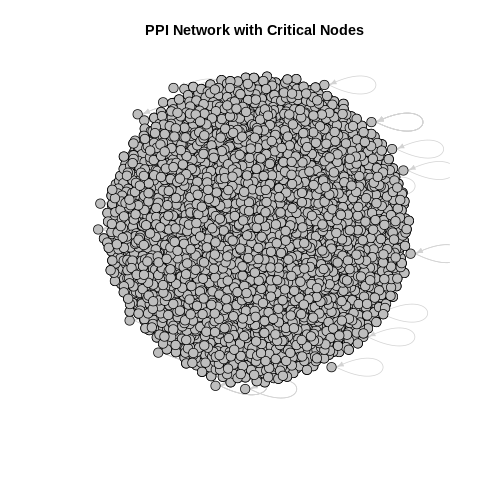

In [ ]:
%%R

# CONTROL THEORY PART 4: INTERPRETATION - CRITICAL NODES VISUALIZATION

# PLOT 1:

# Read the datasets:
ppi_data <- read_excel("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI.xls")
critical_nodes_TypeI <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt", header=FALSE, sep=" ")
critical_nodes_TypeII <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt", header=FALSE, sep=" ")

# Create the Network from the Edgelist:
network <- graph_from_data_frame(ppi_data, directed = TRUE)

# Highlight Critical Nodes:
V(network)$color <- ifelse(V(network)$name %in% critical_nodes_TypeI$Name, "red", "gray")
V(network)$size <- ifelse(V(network)$name %in% critical_nodes_TypeI$Name, 10, 6)

V(network)$color <- ifelse(V(network)$name %in% critical_nodes_TypeII$Name, "blue", V(network)$color)
V(network)$size <- ifelse(V(network)$name %in% critical_nodes_TypeII$Name, 12, V(network)$size)

# Plot the Network:
plot1 <- plot(network, vertex.label=NA, edge.arrow.size=0.5, edge.color="lightgray", main="PPI Network with Critical Nodes")

# Print plot1:
print(plot1)

In [ ]:
%%R

# Classify the genes in Type I/II and order the results based on the K, Kin, and Kout:

process_and_save <- function(nodetype_path, mapping_data_path, output_path) {

    # Load the input data:
    nodetype_procedure1 <- read.table(nodetype_path, header = FALSE)
    mapping_data <- read.table(mapping_data_path, header = TRUE, sep = ",", stringsAsFactors = FALSE)

    # Rename columns:
    colnames(nodetype_procedure1) <- c("gene_name", "K", "Kin", "Kout", "TypeI", "TypeII")
    colnames(mapping_data) <- c("gene_id", "gene_name")

    # Ensure there is only one gene_id per gene_name in mapping_data:
    mapping_data_unique <- mapping_data[!duplicated(mapping_data$gene_name), ]

    # Merge the datasets based on the gene_name column:
    merged_data <- merge(nodetype_procedure1, mapping_data_unique[, c("gene_name", "gene_id")], by = "gene_name", all.x = TRUE)

    # Reorder the columns to place gene_id at the beginning:
    merged_data <- merged_data[, c("gene_id", setdiff(names(merged_data), "gene_id"))]

    # Split the first table into 2 tables:
    TypeI_data <- merged_data[,c("gene_id", "gene_name", "K", "Kin", "Kout", "TypeI")]
    TypeII_data <- merged_data[,c("gene_id", "gene_name", "K", "Kin", "Kout", "TypeII")]

    # Define conditions and names for subsets:
    conditions <- c(0, 1, 2)
    names <- c("K", "K_in", "K_out")

    # Define lists to hold subsets of data:
    TypeI_subsets <- list()
    TypeII_subsets <- list()

    # Split data into subsets based on conditions:
    for (condition in conditions) {
      TypeI_subsets[[condition+1]] <- TypeI_data[TypeI_data$TypeI == condition,]
      TypeII_subsets[[condition+1]] <- TypeII_data[TypeII_data$TypeII == condition,]
    }

    # Combine all subsets into a list:
    all_subsets <- c(TypeI_subsets, TypeII_subsets)
    names(all_subsets) <- c(paste("TypeI", names, sep="_"), paste("TypeII", names, sep="_"))

    # Rank subsets based on K, Kin, Kout and save:
    for (subset_name in names(all_subsets)) {
      for (criterion in c("K", "Kin", "Kout")) {
        ranked_subset <- all_subsets[[subset_name]][order(-all_subsets[[subset_name]][[criterion]]), ]
        filename <- paste0(output_path, "/", subset_name, "_ranked_by_", criterion, ".txt")
        write.table(ranked_subset, filename, sep="\t", row.names=FALSE, quote=FALSE)
      }
    }

    # Define function to get gene details from Ensembl API:
    get_gene_details <- function(gene_id, retries = 3) {
        base_url <- "https://rest.ensembl.org"
        endpoint <- paste0("/lookup/id/", gene_id, "?expand=1")
        for(i in 1:retries) {
            tryCatch({
                response <- GET(url = paste0(base_url, endpoint), add_headers("Content-Type" = "application/json"))
                if(http_type(response) == "application/json") {
                    content <- content(response, "parsed")
                    return(list(description = content$description, biotype = content$biotype))
                }
            }, error = function(e) {
                if(i == retries) {
                    return(list(description = NA, biotype = NA))
                }
                Sys.sleep(5)  # wait for 5 seconds before retrying
            })
        }
        return(list(description = NA, biotype = NA))
    }

    # Define function to enrich top 10 genes with details:
    enrich_table_top10 <- function(table) {

        # Add a placeholder Function column if it doesn't exist:
        if (!"Function" %in% names(table)) {
          table$Function <- NA
        }

        # Take the top 10 rows:
        top_rows <- head(table, 10)

        # Fetch gene details for the top 10 rows:
        gene_details <- lapply(top_rows$gene_id, get_gene_details)

        # Add gene details to the top 10 rows:
        top_rows$Function <- sapply(gene_details, `[[`, "description")
        top_rows$Function <- gsub("\\s*\\[.*?\\]\\s*", "", top_rows$Function) # Remove content in square brackets

        return(top_rows)
    }

    # Apply enrich function to all subsets and rank by K, Kin, Kout:
    enriched_subsets <- lapply(all_subsets, function(subset) {
      return(enrich_table_top10(subset[order(-subset$K), ]))  # Example for ranking by K
    })

    # Print the enriched tables with names and dimensions:
    for (i in 1:length(enriched_subsets)) {
      subset_name <- names(enriched_subsets)[i]
      cat(subset_name, ":\n")
      print(enriched_subsets[[i]])
      cat("Dimensions: ", dim(enriched_subsets[[i]]), "\n\n")
    }

    # Save enriched top 10 genes for each subset:
    for (subset_name in names(enriched_subsets)) {
      filename <- paste0(output_path, "/", subset_name, "_enriched_top10.txt")
      write.table(enriched_subsets[[subset_name]], filename, sep="\t", row.names=FALSE, quote=FALSE)
    }

}

In [ ]:
%%R
# Call the function
nodetype_filepath <- "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/filtered_ppi_network_procedure1.dat.nodetype"
mapping_filepath <- "/content/drive/MyDrive/Colab/Long_COVID/final_results/CT_Final_Results/mart_export.txt"
output_directory <- "/content/drive/MyDrive/Colab/Long_COVID/final_results/CT_Final_Results"
process_and_save(nodetype_filepath, mapping_filepath, output_directory)

TypeI_K :
             gene_id gene_name   K Kin Kout TypeI
5271 ENSG00000141510      TP53 289 190   99     0
1044 ENSG00000005339    CREBBP 269 152  117     0
1493 ENSG00000100393     EP300 266 159  107     0
5663 ENSG00000170027     YWHAG 230 165   65     0
4708 ENSG00000166949     SMAD3 215 136   79     0
1979 ENSG00000177885      GRB2 207  95  112     0
4862 ENSG00000291971       SRC 190  89  101     0
1538 ENSG00000091831      ESR1 169  67  102     0
248  ENSG00000169083        AR 168 105   63     0
4213 ENSG00000139687       RB1 163 102   61     0
                                                                         Function
5271                                                            tumor protein p53
1044                                                         CREB binding protein
1493                                                     E1A binding protein p300
5663 tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein gamma
4708                          

## **Functions**

If there are several genes in common, add the following code into the functions:

```
  # Count the frequency of absolute beta_y values:
  grouped_df <- common_genes_data_II %>%
    dplyr::select(beta_y) %>%
    mutate(abs_beta_y = abs(beta_y)) %>%
    group_by(case_when(
      abs_beta_y > 10 ~ "Values greater than 10",
      abs_beta_y >= 5 ~ "Values between 5 and 10",
      abs_beta_y >= 1 ~ "Values between 1 and 5",
      TRUE ~ "Values lower than 1"
    )) %>%
    summarise(count = n())
  print(grouped_df)
```

In [ ]:
%%R

# TYPE I GENES:

# Install and load the required packages:
#install.packages("VennDiagram")
#library(VennDiagram)

#install.packages("RColorBrewer")
#library(RColorBrewer)

#install.packages("dplyr")
#library(dplyr)

# Create a function to map the critical genes I vs. the genes obtained from the Mt_Robin results:
analyze_critical_genes_TypeI_vs_MtRobin <- function(path_critical_nodes_TypeI,
                                                    path_Mt_Robin,
                                                    output_path) {

  # Load datasets:
  critical_nodes_TypeI <- read.table(path_critical_nodes_TypeI, header=TRUE, sep="\t")
  Mt_Robin <- read.table(path_Mt_Robin, header=TRUE, sep="\t")
  print("Mt_Robin dimension")
  print(dim(Mt_Robin))

  # Extract unique gene lists for Venn Diagram calculation:
  critical_genes <- unique(critical_nodes_TypeI$Name)
  genes_Mt_Robin <- unique(Mt_Robin$gene_name)

  # Identify common and unique genes for Venn Diagram:
  common_genes_recheck_I <- intersect(critical_genes, genes_Mt_Robin)

  # Display gene counts for Venn Diagram:
  cat("Number of common genes:", length(common_genes_recheck_I), "\n")
  cat("Number of genes unique to critical_genes_I:", length(setdiff(critical_genes, genes_Mt_Robin)), "\n")
  cat("Number of genes unique to Mt_Robin:", length(setdiff(genes_Mt_Robin, critical_genes)), "\n")

  # Calculate the unique and common gene counts for Venn Diagram:
  area1 <- length(critical_genes)  # Number of unique genes in critical_genes
  area2 <- length(genes_Mt_Robin)  # Number of unique genes in genes_Mt_Robin
  crossArea <- length(common_genes_recheck_I)  # Number of common genes

  # Select a color-blind-friendly palette:
  colors <- brewer.pal(n = 3, name = "Set2")[2:3]

  # Create pairwise Venn diagram with perfect circles:
  invisible(draw.pairwise.venn(area1 = area1, area2 = area2, cross.area = crossArea,
                               category = c("Type I Critical Genes", "Causal Genes"), fill = colors,
                               lwd = 2, cex = 1.5, cat.cex = 1.2, cat.pos = 2,
                               cat.dist = 0.03, cat.fontfamily = "sans",
                               scaled = FALSE))

  # Filter Mt_Robin genes for all occurrences of common genes (including repeats):
  common_genes_data_I <- Mt_Robin %>%
    filter(gene_name %in% common_genes_recheck_I) %>%
    arrange(gene_name, abs(desc(beta_y))) # Optional: Arrange by gene_name and beta_y

  # Save the filtered common genes data to output path:
  write.table(common_genes_data_I, output_path, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

  # Return a glimpse of the saved data:
  return(glimpse(common_genes_data_I))
}

In [ ]:
%%R

# TYPE II GENES:

# Install and load the required packages:
# install.packages("venn")
# library(venn)
# install.packages("dplyr")
# library(dplyr)

# Create a function to map the critical genes II vs. the genes obtained from the Mt_Robin results:
analyze_critical_genes_TypeII_vs_MtRobin <- function(path_critical_nodes_TypeII,
                                                     path_Mt_Robin,
                                                     output_path) {

  # Load datasets:
  critical_nodes_TypeII <- read.table(path_critical_nodes_TypeII, header=TRUE, sep="\t")
  Mt_Robin <- read.table(path_Mt_Robin, header=TRUE, sep="\t")
  print("Mt_Robin dimension")
  print(dim(Mt_Robin))

  # Extract unique gene lists for Venn Diagram calculation:
  critical_genes <- unique(critical_nodes_TypeII$Name)
  genes_Mt_Robin <- unique(Mt_Robin$gene_name)

  # Identify common and unique genes for Venn Diagram:
  common_genes_recheck_II <- intersect(critical_genes, genes_Mt_Robin)

  # Display gene counts for Venn Diagram:
  cat("Number of common genes:", length(common_genes_recheck_II), "\n")
  cat("Number of genes unique to critical_genes_II:", length(setdiff(critical_genes, genes_Mt_Robin)), "\n")
  cat("Number of genes unique to Mt_Robin:", length(setdiff(genes_Mt_Robin, critical_genes)), "\n")

  # Calculate the unique and common gene counts for Venn Diagram:
  area1 <- length(critical_genes)  # Number of unique genes in critical_genes
  area2 <- length(genes_Mt_Robin)  # Number of unique genes in genes_Mt_Robin
  crossArea <- length(common_genes_recheck_II)  # Number of common genes

  # Select a color-blind-friendly palette:
  colors <- brewer.pal(n = 3, name = "Set2")[2:3]

  # Create pairwise Venn diagram with perfect circles:
  invisible(draw.pairwise.venn(area1 = area1, area2 = area2, cross.area = crossArea,
                               category = c("Type II Critical Genes", "Causal Genes"), fill = colors,
                               lwd = 2, cex = 1.5, cat.cex = 1.2, cat.pos = 2,
                               cat.dist = 0.03, cat.fontfamily = "sans",
                               scaled = FALSE))

  # Filter Mt_Robin genes for all occurrences of common genes (including repeats):
  common_genes_data_II <- Mt_Robin %>%
    filter(gene_name %in% common_genes_recheck_II) %>%
    arrange(gene_name, abs(desc(beta_y))) # Optional: Arrange by gene_name and beta_y

  # Save the filtered common genes data to output path:
  write.table(common_genes_data_II, output_path, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

  # Return a glimpse of the saved data:
  return(glimpse(common_genes_data_II))
}

In [ ]:
%%R

# TYPE I and II GENES:

# Install and load the required packages:
# install.packages("venn")
# library(venn)
# install.packages("dplyr")
# library(dplyr)

# Create a function to map the critical genes I and II vs. the genes obtained from the Mt_Robin results:
analyze_combined_critical_genes_vs_MtRobin <- function(path_critical_nodes_TypeI,
                                                       path_critical_nodes_TypeII,
                                                       path_Mt_Robin,
                                                       output_path) {

  # Load the datasets:
  critical_nodes_TypeI <- read.table(path_critical_nodes_TypeI, header=TRUE, sep="\t")
  critical_nodes_TypeII <- read.table(path_critical_nodes_TypeII, header=TRUE, sep="\t")
  Mt_Robin <- read.table(path_Mt_Robin, header=TRUE, sep="\t")
  print("Mt_Robin dimension")
  print(dim(Mt_Robin))

  # Combine Type I and Type II datasets:
  combined_data <- rbind(critical_nodes_TypeI, critical_nodes_TypeII)

  # Extract unique gene lists for Venn Diagram calculation:
  critical_genes <- unique(combined_data$Name)
  genes_Mt_Robin <- unique(Mt_Robin$gene_name)

  # Identify common genes for Venn Diagram:
  common_genes_recheck_combined <- intersect(critical_genes, genes_Mt_Robin)

  # Display gene counts for Venn Diagram:
  cat("Number of common genes:", length(common_genes_recheck_combined), "\n")
  cat("Number of genes unique to combined critical genes:", length(setdiff(critical_genes, genes_Mt_Robin)), "\n")
  cat("Number of genes unique to Mt_Robin:", length(setdiff(genes_Mt_Robin, critical_genes)), "\n")

  # Calculate the unique and common gene counts for Venn Diagram:
  area1 <- length(critical_genes)  # Number of unique genes in critical_genes
  area2 <- length(genes_Mt_Robin)  # Number of unique genes in genes_Mt_Robin
  crossArea <- length(common_genes_recheck_combined)  # Number of common genes

  # Select a color-blind-friendly palette:
  colors <- brewer.pal(n = 3, name = "Set2")[2:3]

  # Create pairwise Venn diagram with perfect circles:
  invisible(draw.pairwise.venn(area1 = area1, area2 = area2, cross.area = crossArea,
                               category = c("Type I/II Critical Genes", "Causal Genes"), fill = colors,
                               lwd = 2, cex = 1.5, cat.cex = 1.2, cat.pos = 2,
                               cat.dist = 0.03, cat.fontfamily = "sans",
                               scaled = FALSE))

  # Filter Mt_Robin genes for all occurrences of common genes (including repeats):
  filtered_Mt_Robin <- Mt_Robin %>%
    filter(gene_name %in% common_genes_recheck_combined) %>%
    arrange(gene_name, abs(desc(beta_y))) # Optional: Arrange by gene_name and beta_y

  # Save the combined dataset:
  write.table(combined_data, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_TypeII_procedure1.txt", sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

  # Save the filtered common genes data to output path:
  write.table(filtered_Mt_Robin, output_path, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

  # Return a glimpse of the saved data:
  return(glimpse(filtered_Mt_Robin))
}

## **GWAS1-fs**

[1] "Mt_Robin dimension"
[1] 14 24
Number of common genes: 0 
Number of genes unique to critical_genes_I: 1208 
Number of genes unique to Mt_Robin: 14 
Rows: 0
Columns: 24
$ gene_id    <chr> 
$ gene_name  <chr> 
$ SNPs       <int> 
$ SNPs_IDs   <chr> 
$ Obs        <int> 
$ beta_y     <dbl> 
$ Min        <dbl> 
$ First_Q    <dbl> 
$ Median     <dbl> 
$ Third_Q    <dbl> 
$ Max        <dbl> 
$ SD_RE      <dbl> 
$ Res_SD_RE  <dbl> 
$ Var_RE     <dbl> 
$ Res_Var_RE <dbl> 
$ SE_FE      <dbl> 
$ t_value_FE <dbl> 
$ REML       <dbl> 
$ p_value    <dbl> 
$ FDR        <dbl> 
$ CI_lower   <dbl> 
$ CI_upper   <dbl> 
$ tissues    <chr> 
$ categories <chr> 


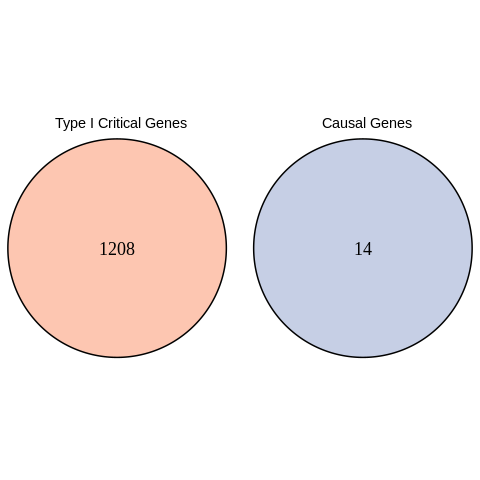

In [ ]:
%%R
# Call the first function to find the significant genes type I based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeI_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure1/causal_critical_genes_TypeI_gwas1fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 14 24
Number of common genes: 1 
Number of genes unique to critical_genes_II: 432 
Number of genes unique to Mt_Robin: 13 
Rows: 1
Columns: 24
$ gene_id    <chr> "ENSG00000184983"
$ gene_name  <chr> "NDUFA6"
$ SNPs       <int> 2
$ SNPs_IDs   <chr> "rs137139,rs139043947"
$ Obs        <int> 24
$ beta_y     <dbl> 9.789797
$ Min        <dbl> -2.918321
$ First_Q    <dbl> -0.4695724
$ Median     <dbl> -0.0424969
$ Third_Q    <dbl> 0.6506457
$ Max        <dbl> 1.505809
$ SD_RE      <dbl> 0
$ Res_SD_RE  <dbl> 4.670701
$ Var_RE     <dbl> 0
$ Res_Var_RE <dbl> 21.81545
$ SE_FE      <dbl> 0.6053178
$ t_value_FE <dbl> 16.17299
$ REML       <dbl> 16.25649
$ p_value    <dbl> 0
$ FDR        <dbl> 0
$ CI_lower   <dbl> 8.603374
$ CI_upper   <dbl> 10.97622
$ tissues    <chr> "Subcutaneous adipose; Cultured fibroblasts; Sigmoid colon;…
$ categories <chr> "Adipose Tissue; Connective Tissue; Digestive System; Respi…


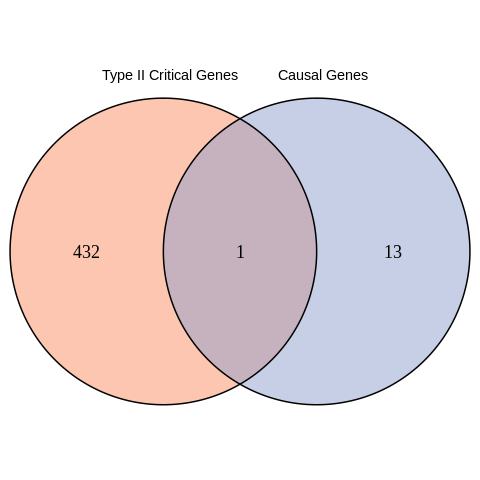

In [ ]:
%%R
# Call the second function to find the significant genes type II based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeII_vs_MtRobin(
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure1/causal_critical_genes_TypeII_gwas1fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 14 24
Number of common genes: 1 
Number of genes unique to combined critical genes: 1640 
Number of genes unique to Mt_Robin: 13 
Rows: 1
Columns: 24
$ gene_id    <chr> "ENSG00000184983"
$ gene_name  <chr> "NDUFA6"
$ SNPs       <int> 2
$ SNPs_IDs   <chr> "rs137139,rs139043947"
$ Obs        <int> 24
$ beta_y     <dbl> 9.789797
$ Min        <dbl> -2.918321
$ First_Q    <dbl> -0.4695724
$ Median     <dbl> -0.0424969
$ Third_Q    <dbl> 0.6506457
$ Max        <dbl> 1.505809
$ SD_RE      <dbl> 0
$ Res_SD_RE  <dbl> 4.670701
$ Var_RE     <dbl> 0
$ Res_Var_RE <dbl> 21.81545
$ SE_FE      <dbl> 0.6053178
$ t_value_FE <dbl> 16.17299
$ REML       <dbl> 16.25649
$ p_value    <dbl> 0
$ FDR        <dbl> 0
$ CI_lower   <dbl> 8.603374
$ CI_upper   <dbl> 10.97622
$ tissues    <chr> "Subcutaneous adipose; Cultured fibroblasts; Sigmoid colon;…
$ categories <chr> "Adipose Tissue; Connective Tissue; Digestive System; Respi…


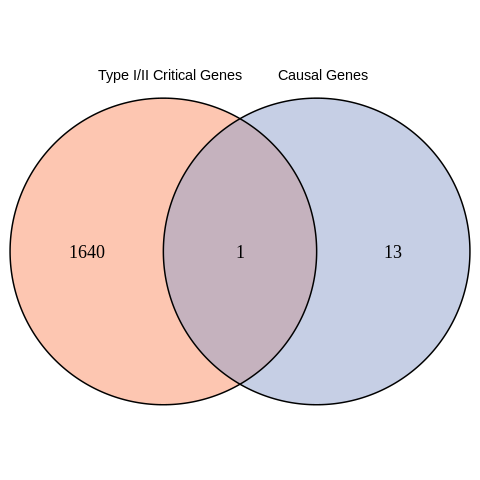

In [ ]:
%%R
# Call the third function to find the significant genes type I and II based on the beta_value from Mt_Robin:
analyze_combined_critical_genes_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure1/causal_critical_genes_combined_gwas1fs_procedure1.txt"
)

## **GWAS2-fs**

[1] "Mt_Robin dimension"
[1] 19 24
Number of common genes: 1 
Number of genes unique to critical_genes_I: 1207 
Number of genes unique to Mt_Robin: 18 
Rows: 1
Columns: 24
$ gene_id    <chr> "ENSG00000163161"
$ gene_name  <chr> "ERCC3"
$ SNPs       <int> 5
$ SNPs_IDs   <chr> "rs11688763,rs4150476,rs56369397,rs7568261,rs76693372"
$ Obs        <int> 8
$ beta_y     <dbl> 19.93042
$ Min        <dbl> -1.253754
$ First_Q    <dbl> -0.2010462
$ Median     <dbl> 0.0009795153
$ Third_Q    <dbl> 0.999582
$ Max        <dbl> 1.762694
$ SD_RE      <dbl> 0
$ Res_SD_RE  <dbl> 2.84227
$ Var_RE     <dbl> 0
$ Res_Var_RE <dbl> 8.078501
$ SE_FE      <dbl> 1.567701
$ t_value_FE <dbl> 12.71315
$ REML       <dbl> -10.11285
$ p_value    <dbl> 0
$ FDR        <dbl> 0
$ CI_lower   <dbl> 16.85773
$ CI_upper   <dbl> 23.00312
$ tissues    <chr> "Amygdala brain; Cerebellum; Atrial appendage; Tibial nerve…
$ categories <chr> "Brain and Nervous System; Cardiovascular System; Endocrine…


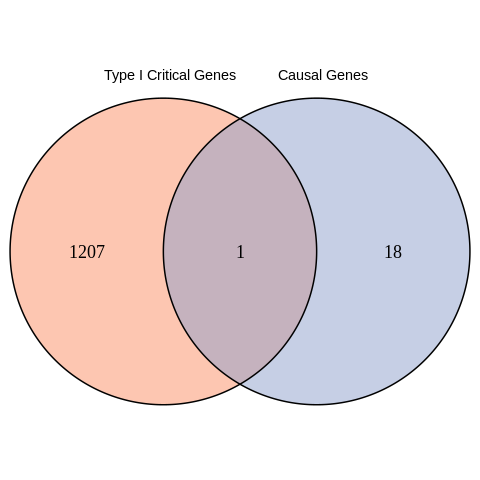

In [ ]:
%%R
# Call the first function to find the significant genes type I based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeI_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure1/causal_critical_genes_TypeI_gwas2fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 19 24
Number of common genes: 0 
Number of genes unique to critical_genes_II: 433 
Number of genes unique to Mt_Robin: 19 
Rows: 0
Columns: 24
$ gene_id    <chr> 
$ gene_name  <chr> 
$ SNPs       <int> 
$ SNPs_IDs   <chr> 
$ Obs        <int> 
$ beta_y     <dbl> 
$ Min        <dbl> 
$ First_Q    <dbl> 
$ Median     <dbl> 
$ Third_Q    <dbl> 
$ Max        <dbl> 
$ SD_RE      <dbl> 
$ Res_SD_RE  <dbl> 
$ Var_RE     <dbl> 
$ Res_Var_RE <dbl> 
$ SE_FE      <dbl> 
$ t_value_FE <dbl> 
$ REML       <dbl> 
$ p_value    <dbl> 
$ FDR        <dbl> 
$ CI_lower   <dbl> 
$ CI_upper   <dbl> 
$ tissues    <chr> 
$ categories <chr> 


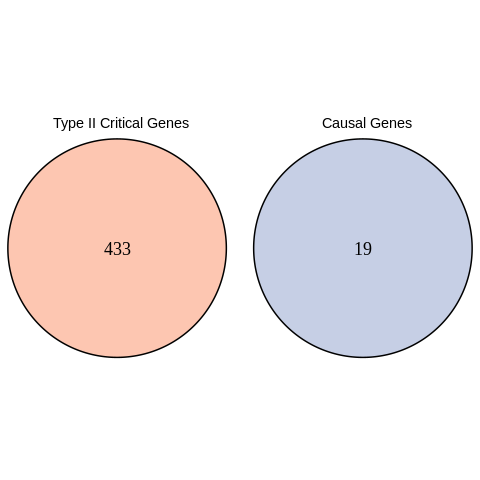

In [ ]:
%%R
# Call the second function to find the significant genes type II based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeII_vs_MtRobin(
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure1/causal_critical_genes_TypeII_gwas2fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 19 24
Number of common genes: 1 
Number of genes unique to combined critical genes: 1640 
Number of genes unique to Mt_Robin: 18 
Rows: 1
Columns: 24
$ gene_id    <chr> "ENSG00000163161"
$ gene_name  <chr> "ERCC3"
$ SNPs       <int> 5
$ SNPs_IDs   <chr> "rs11688763,rs4150476,rs56369397,rs7568261,rs76693372"
$ Obs        <int> 8
$ beta_y     <dbl> 19.93042
$ Min        <dbl> -1.253754
$ First_Q    <dbl> -0.2010462
$ Median     <dbl> 0.0009795153
$ Third_Q    <dbl> 0.999582
$ Max        <dbl> 1.762694
$ SD_RE      <dbl> 0
$ Res_SD_RE  <dbl> 2.84227
$ Var_RE     <dbl> 0
$ Res_Var_RE <dbl> 8.078501
$ SE_FE      <dbl> 1.567701
$ t_value_FE <dbl> 12.71315
$ REML       <dbl> -10.11285
$ p_value    <dbl> 0
$ FDR        <dbl> 0
$ CI_lower   <dbl> 16.85773
$ CI_upper   <dbl> 23.00312
$ tissues    <chr> "Amygdala brain; Cerebellum; Atrial appendage; Tibial nerve…
$ categories <chr> "Brain and Nervous System; Cardiovascular System; Endocrine…


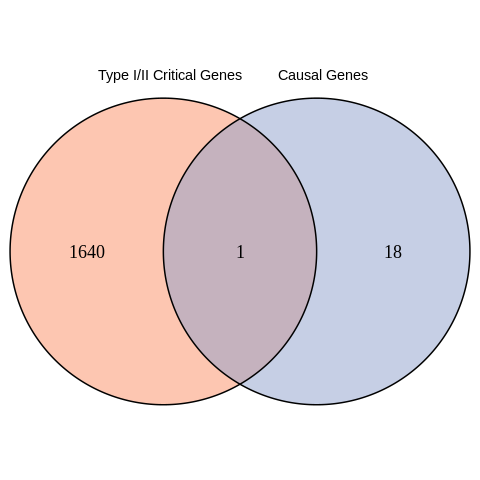

In [ ]:
%%R
# Call the third function to find the significant genes type I and II based on the beta_value from Mt_Robin:
analyze_combined_critical_genes_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure1/causal_critical_genes_combined_gwas2fs_procedure1.txt"
)

## **GWAS3-fs**

[1] "Mt_Robin dimension"
[1] 10 24
Number of common genes: 1 
Number of genes unique to critical_genes_I: 1207 
Number of genes unique to Mt_Robin: 9 
Rows: 1
Columns: 24
$ gene_id    <chr> "ENSG00000156603"
$ gene_name  <chr> "MED19"
$ SNPs       <int> 14
$ SNPs_IDs   <chr> "rs11229259,rs11601607,rs117394301,rs117732092,rs12801976,r…
$ Obs        <int> 30
$ beta_y     <dbl> 5.155099
$ Min        <dbl> -2.434541
$ First_Q    <dbl> -0.1434968
$ Median     <dbl> 0.1384255
$ Third_Q    <dbl> 0.4958109
$ Max        <dbl> 1.321824
$ SD_RE      <int> 0
$ Res_SD_RE  <dbl> 3.237346
$ Var_RE     <int> 0
$ Res_Var_RE <dbl> 10.48041
$ SE_FE      <dbl> 0.5199279
$ t_value_FE <dbl> 9.915027
$ REML       <dbl> -4.079301
$ p_value    <int> 0
$ FDR        <int> 0
$ CI_lower   <dbl> 4.13604
$ CI_upper   <dbl> 6.174158
$ tissues    <chr> "Subcutaneous adipose; Spinal cord; Whole blood; Visceral o…
$ categories <chr> "Adipose Tissue; Brain and Nervous System; Blood; Cardiovas…


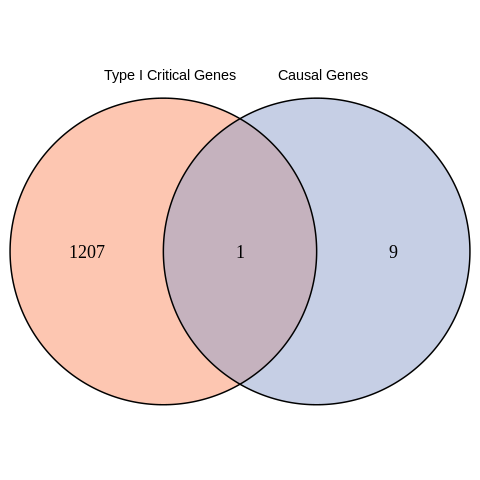

In [ ]:
%%R
# Call the first function to find the significant genes type I based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeI_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure1/causal_critical_genes_TypeI_gwas3fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 10 24
Number of common genes: 1 
Number of genes unique to critical_genes_II: 432 
Number of genes unique to Mt_Robin: 9 
Rows: 1
Columns: 24
$ gene_id    <chr> "ENSG00000184983"
$ gene_name  <chr> "NDUFA6"
$ SNPs       <int> 2
$ SNPs_IDs   <chr> "rs137139,rs139043947"
$ Obs        <int> 24
$ beta_y     <dbl> 9.537779
$ Min        <dbl> -2.905364
$ First_Q    <dbl> -0.5220021
$ Median     <dbl> -0.04236706
$ Third_Q    <dbl> 0.6476085
$ Max        <dbl> 1.498957
$ SD_RE      <int> 0
$ Res_SD_RE  <dbl> 4.691699
$ Var_RE     <int> 0
$ Res_Var_RE <dbl> 22.01204
$ SE_FE      <dbl> 0.5926211
$ t_value_FE <dbl> 16.09423
$ REML       <dbl> 16.51419
$ p_value    <int> 0
$ FDR        <int> 0
$ CI_lower   <dbl> 8.376242
$ CI_upper   <dbl> 10.69932
$ tissues    <chr> "Subcutaneous adipose; Cultured fibroblasts; Sigmoid colon;…
$ categories <chr> "Adipose Tissue; Connective Tissue; Digestive System; Respi…


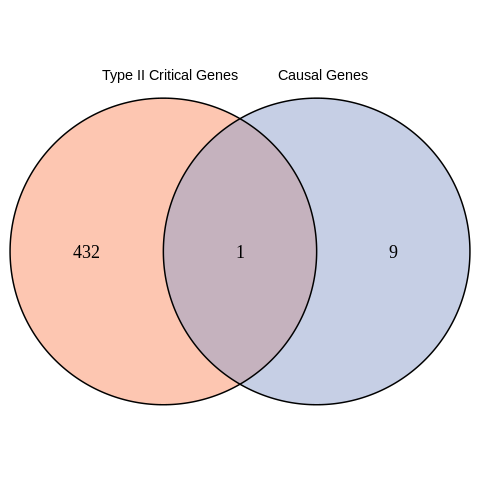

In [ ]:
%%R
# Call the second function to find the significant genes type II based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeII_vs_MtRobin(
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure1/causal_critical_genes_TypeII_gwas3fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 10 24
Number of common genes: 2 
Number of genes unique to combined critical genes: 1639 
Number of genes unique to Mt_Robin: 8 
Rows: 2
Columns: 24
$ gene_id    <chr> "ENSG00000156603", "ENSG00000184983"
$ gene_name  <chr> "MED19", "NDUFA6"
$ SNPs       <int> 14, 2
$ SNPs_IDs   <chr> "rs11229259,rs11601607,rs117394301,rs117732092,rs12801976,r…
$ Obs        <int> 30, 24
$ beta_y     <dbl> 5.155099, 9.537779
$ Min        <dbl> -2.434541, -2.905364
$ First_Q    <dbl> -0.1434968, -0.5220021
$ Median     <dbl> 0.13842550, -0.04236706
$ Third_Q    <dbl> 0.4958109, 0.6476085
$ Max        <dbl> 1.321824, 1.498957
$ SD_RE      <int> 0, 0
$ Res_SD_RE  <dbl> 3.237346, 4.691699
$ Var_RE     <int> 0, 0
$ Res_Var_RE <dbl> 10.48041, 22.01204
$ SE_FE      <dbl> 0.5199279, 0.5926211
$ t_value_FE <dbl> 9.915027, 16.094228
$ REML       <dbl> -4.079301, 16.514186
$ p_value    <int> 0, 0
$ FDR        <int> 0, 0
$ CI_lower   <dbl> 4.136040, 8.376242
$ CI_upper   <dbl> 6.174158,

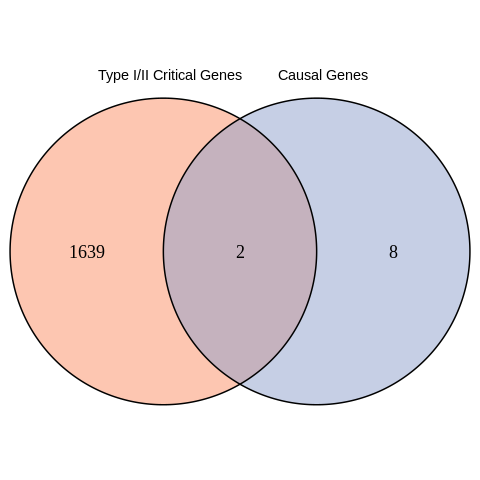

In [ ]:
%%R
# Call the third function to find the significant genes type I and II based on the beta_value from Mt_Robin:
analyze_combined_critical_genes_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure1/causal_critical_genes_combined_gwas3fs_procedure1.txt"
)

## **GWAS4-fs**

[1] "Mt_Robin dimension"
[1] 24 24
Number of common genes: 2 
Number of genes unique to critical_genes_I: 1206 
Number of genes unique to Mt_Robin: 22 
Rows: 2
Columns: 24
$ gene_id    <chr> "ENSG00000163161", "ENSG00000132305"
$ gene_name  <chr> "ERCC3", "IMMT"
$ SNPs       <int> 5, 7
$ SNPs_IDs   <chr> "rs11688763,rs4150476,rs56369397,rs7568261,rs76693372", "rs…
$ Obs        <int> 8, 14
$ beta_y     <dbl> 16.849151, -4.884465
$ Min        <dbl> -1.567136, -2.056641
$ First_Q    <dbl> -0.5853061, -0.5117281
$ Median     <dbl> -0.2506886, -0.1990566
$ Third_Q    <dbl> 0.9248821, 0.2892486
$ Max        <dbl> 1.065202, 1.624274
$ SD_RE      <dbl> 0, 0
$ Res_SD_RE  <dbl> 3.108471, 3.891861
$ Var_RE     <dbl> 0, 0
$ Res_Var_RE <dbl> 9.66259, 15.14658
$ SE_FE      <dbl> 1.4556541, 0.5218604
$ t_value_FE <dbl> 11.574969, -9.359716
$ REML       <dbl> -8.532092, -15.604341
$ p_value    <dbl> 0, 0
$ FDR        <dbl> 0, 0
$ CI_lower   <dbl> 13.996069, -5.907311
$ CI_upper   <dbl> 19.702233, -3.8

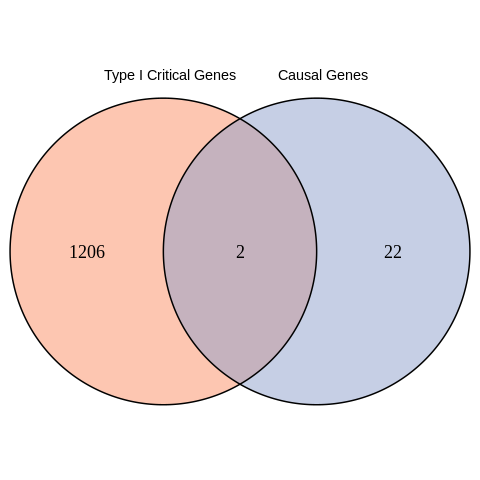

In [ ]:
%%R
# Call the first function to find the significant genes type I based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeI_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure1/causal_critical_genes_TypeI_gwas4fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 24 24
Number of common genes: 0 
Number of genes unique to critical_genes_II: 433 
Number of genes unique to Mt_Robin: 24 
Rows: 0
Columns: 24
$ gene_id    <chr> 
$ gene_name  <chr> 
$ SNPs       <int> 
$ SNPs_IDs   <chr> 
$ Obs        <int> 
$ beta_y     <dbl> 
$ Min        <dbl> 
$ First_Q    <dbl> 
$ Median     <dbl> 
$ Third_Q    <dbl> 
$ Max        <dbl> 
$ SD_RE      <dbl> 
$ Res_SD_RE  <dbl> 
$ Var_RE     <dbl> 
$ Res_Var_RE <dbl> 
$ SE_FE      <dbl> 
$ t_value_FE <dbl> 
$ REML       <dbl> 
$ p_value    <dbl> 
$ FDR        <dbl> 
$ CI_lower   <dbl> 
$ CI_upper   <dbl> 
$ tissues    <chr> 
$ categories <chr> 


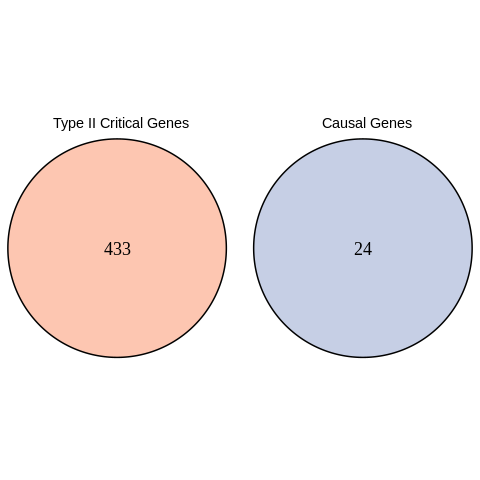

In [ ]:
%%R
# Call the second function to find the significant genes type II based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeII_vs_MtRobin(
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure1/causal_critical_genes_TypeII_gwas4fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 24 24
Number of common genes: 2 
Number of genes unique to combined critical genes: 1639 
Number of genes unique to Mt_Robin: 22 
Rows: 2
Columns: 24
$ gene_id    <chr> "ENSG00000163161", "ENSG00000132305"
$ gene_name  <chr> "ERCC3", "IMMT"
$ SNPs       <int> 5, 7
$ SNPs_IDs   <chr> "rs11688763,rs4150476,rs56369397,rs7568261,rs76693372", "rs…
$ Obs        <int> 8, 14
$ beta_y     <dbl> 16.849151, -4.884465
$ Min        <dbl> -1.567136, -2.056641
$ First_Q    <dbl> -0.5853061, -0.5117281
$ Median     <dbl> -0.2506886, -0.1990566
$ Third_Q    <dbl> 0.9248821, 0.2892486
$ Max        <dbl> 1.065202, 1.624274
$ SD_RE      <dbl> 0, 0
$ Res_SD_RE  <dbl> 3.108471, 3.891861
$ Var_RE     <dbl> 0, 0
$ Res_Var_RE <dbl> 9.66259, 15.14658
$ SE_FE      <dbl> 1.4556541, 0.5218604
$ t_value_FE <dbl> 11.574969, -9.359716
$ REML       <dbl> -8.532092, -15.604341
$ p_value    <dbl> 0, 0
$ FDR        <dbl> 0, 0
$ CI_lower   <dbl> 13.996069, -5.907311
$ CI_upper   <dbl> 19.70223

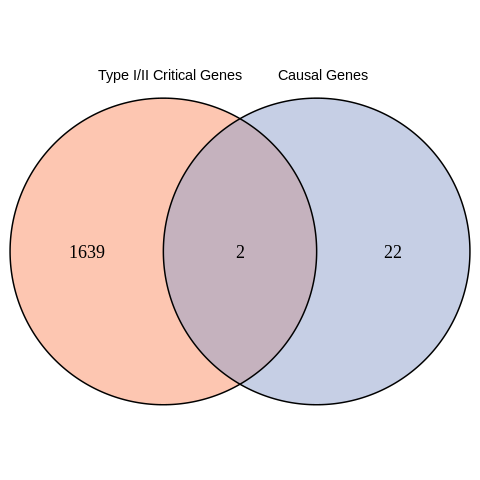

In [ ]:
%%R
# Call the third function to find the significant genes type I and II based on the beta_value from Mt_Robin:
analyze_combined_critical_genes_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure1/causal_critical_genes_combined_gwas4fs_procedure1.txt"
)

## **ALL GWAS**

[1] "Mt_Robin dimension"
[1] 67 24
Number of common genes: 3 
Number of genes unique to critical_genes_I: 1205 
Number of genes unique to Mt_Robin: 47 
Rows: 4
Columns: 24
$ gene_id    <chr> "ENSG00000163161", "ENSG00000163161", "ENSG00000132305", "E…
$ gene_name  <chr> "ERCC3", "ERCC3", "IMMT", "MED19"
$ SNPs       <int> 5, 5, 7, 14
$ SNPs_IDs   <chr> "rs11688763,rs4150476,rs56369397,rs7568261,rs76693372", "rs…
$ Obs        <int> 8, 8, 14, 30
$ beta_y     <dbl> 16.849151, 19.930424, -4.884465, 5.155099
$ Min        <dbl> -1.567136, -1.253754, -2.056641, -2.434541
$ First_Q    <dbl> -0.5853061, -0.2010462, -0.5117281, -0.1434968
$ Median     <dbl> -0.2506886087, 0.0009795153, -0.1990566101, 0.1384255019
$ Third_Q    <dbl> 0.9248821, 0.9995820, 0.2892486, 0.4958109
$ Max        <dbl> 1.065202, 1.762694, 1.624274, 1.321824
$ SD_RE      <dbl> 0, 0, 0, 0
$ Res_SD_RE  <dbl> 3.108471, 2.842270, 3.891861, 3.237346
$ Var_RE     <dbl> 0, 0, 0, 0
$ Res_Var_RE <dbl> 9.662590, 8.078501, 15.146579,

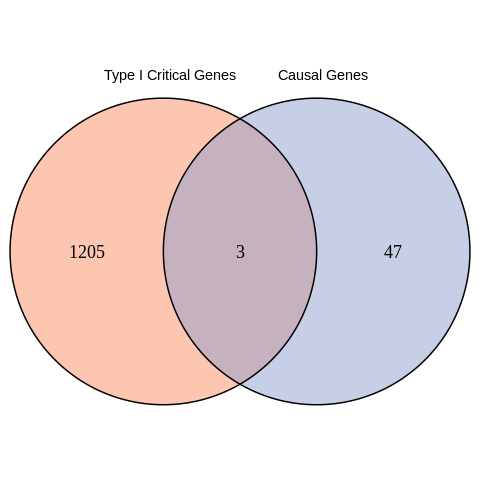

In [ ]:
%%R
# Call the first function to find the significant genes type I based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeI_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure1/causal_critical_genes_TypeI_gwas1fs_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 67 24
Number of common genes: 1 
Number of genes unique to critical_genes_II: 432 
Number of genes unique to Mt_Robin: 49 
Rows: 2
Columns: 24
$ gene_id    <chr> "ENSG00000184983", "ENSG00000184983"
$ gene_name  <chr> "NDUFA6", "NDUFA6"
$ SNPs       <int> 2, 2
$ SNPs_IDs   <chr> "rs137139,rs139043947", "rs137139,rs139043947"
$ Obs        <int> 24, 24
$ beta_y     <dbl> 9.537779, 9.789797
$ Min        <dbl> -2.905364, -2.918321
$ First_Q    <dbl> -0.5220021, -0.4695724
$ Median     <dbl> -0.04236706, -0.04249690
$ Third_Q    <dbl> 0.6476085, 0.6506457
$ Max        <dbl> 1.498957, 1.505809
$ SD_RE      <dbl> 0, 0
$ Res_SD_RE  <dbl> 4.691699, 4.670701
$ Var_RE     <dbl> 0, 0
$ Res_Var_RE <dbl> 22.01204, 21.81545
$ SE_FE      <dbl> 0.5926211, 0.6053178
$ t_value_FE <dbl> 16.09423, 16.17299
$ REML       <dbl> 16.51419, 16.25649
$ p_value    <dbl> 0, 0
$ FDR        <dbl> 0, 0
$ CI_lower   <dbl> 8.376242, 8.603374
$ CI_upper   <dbl> 10.69932, 10.97622
$ tissues   

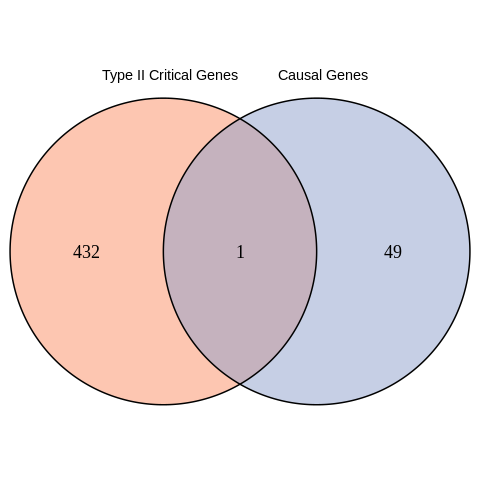

In [ ]:
%%R
# Call the second function to find the significant genes type II based on the beta_value from Mt_Robin:
analyze_critical_genes_TypeII_vs_MtRobin(
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure1/critical_causal_genes_TypeII_combined_gwas_procedure1.txt"
)

[1] "Mt_Robin dimension"
[1] 67 24
Number of common genes: 4 
Number of genes unique to combined critical genes: 1637 
Number of genes unique to Mt_Robin: 46 
Rows: 6
Columns: 24
$ gene_id    <chr> "ENSG00000163161", "ENSG00000163161", "ENSG00000132305", "E…
$ gene_name  <chr> "ERCC3", "ERCC3", "IMMT", "MED19", "NDUFA6", "NDUFA6"
$ SNPs       <int> 5, 5, 7, 14, 2, 2
$ SNPs_IDs   <chr> "rs11688763,rs4150476,rs56369397,rs7568261,rs76693372", "rs…
$ Obs        <int> 8, 8, 14, 30, 24, 24
$ beta_y     <dbl> 16.849151, 19.930424, -4.884465, 5.155099, 9.537779, 9.7897…
$ Min        <dbl> -1.567136, -1.253754, -2.056641, -2.434541, -2.905364, -2.9…
$ First_Q    <dbl> -0.5853061, -0.2010462, -0.5117281, -0.1434968, -0.5220021,…
$ Median     <dbl> -0.2506886087, 0.0009795153, -0.1990566101, 0.1384255019, -…
$ Third_Q    <dbl> 0.9248821, 0.9995820, 0.2892486, 0.4958109, 0.6476085, 0.65…
$ Max        <dbl> 1.065202, 1.762694, 1.624274, 1.321824, 1.498957, 1.505809
$ SD_RE      <dbl> 0, 0, 0, 0, 0,

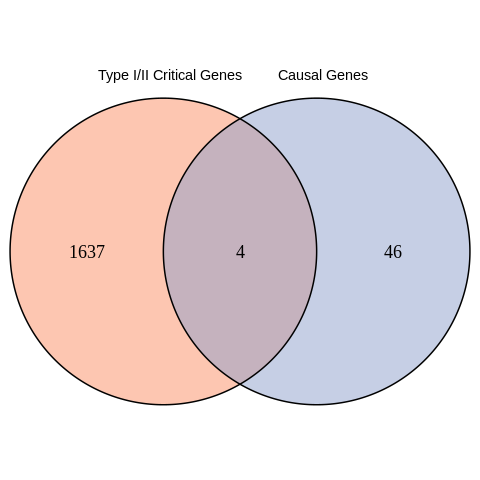

In [ ]:
%%R
# Call the third function to find the significant genes type I and II based on the beta_value from Mt_Robin:
analyze_combined_critical_genes_vs_MtRobin(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure1/critical_causal_genes_TypeI_TypeII_combined_gwas_procedure1.txt"
)

# **Procedure 2**

**Steps:**

**Overlap - Control Theory**
1. Overlap the `PASC_case_data` with the results from Mt_Robin.
2. Apply Control Theory to the result.


## **Functions**

In [ ]:
%%R

# FUNCTION 1:

# Install and load the required package:
#install.packages("VennDiagram")
#library(VennDiagram)

# Install and load RColorBrewer:
#install.packages("RColorBrewer")
#library(RColorBrewer)

# Create a function to find the common genes:
find_common_genes <- function(path_PASC_case_subset,
                              path_Mt_Robin,
                              output_path) {

  # Load the PASC_case_subset file:
  PASC_case_subset <- read.table(path_PASC_case_subset, header=TRUE, sep="\t")

  # Load the Mt_Robin file:
  Mt_Robin <- read.table(path_Mt_Robin, header = TRUE, sep="\t")

  # Extract gene lists from both data sets and check the number of genes:
  genes_PASC <- PASC_case_subset$Gene_Symbol
  genes_Mt_Robin <- Mt_Robin$gene_name

  # Remove duplicate genes:
  genes_PASC_unique <- unique(genes_PASC)
  genes_Mt_Robin_unique <- unique(genes_Mt_Robin)

  # Check the number of genes after removing duplicates:
  cat("Number of unique genes in PASC before overlapping:", length(genes_PASC_unique), "\n")
  cat("Number of unique genes in Mt_Robin before overlapping:", length(genes_Mt_Robin_unique), "\n")

  # Identify common genes:
  common_genes_recheck <- intersect(genes_PASC_unique, genes_Mt_Robin_unique)

  # Identify unique genes to each dataset:
  unique_PASC_recheck <- setdiff(genes_PASC_unique, genes_Mt_Robin_unique)
  unique_Mt_Robin_recheck <- setdiff(genes_Mt_Robin_unique, genes_PASC_unique)

  # Check the number of genes in each category:
  cat("Number of common genes:", length(common_genes_recheck), "\n")
  cat("Number of genes unique to PASC after overlapping:", length(unique_PASC_recheck), "\n")
  cat("Number of genes unique to Mt_Robin after overlapping:", length(unique_Mt_Robin_recheck), "\n")

  # Calculate the unique and common gene counts for Venn Diagram:
  area1 <- length(genes_PASC_unique)  # Number of unique genes in critical_genes
  area2 <- length(genes_Mt_Robin_unique)  # Number of unique genes in genes_Mt_Robin
  crossArea <- length(common_genes_recheck)  # Number of common genes

  # Select a color-blind-friendly palette:
  colors <- brewer.pal(n = 3, name = "Set2")[2:3]

  # Create pairwise Venn diagram:
  invisible(draw.pairwise.venn(area1 = area1, area2 = area2, cross.area = crossArea,
                               category = c("RNA-seq Genes", "Causal Genes"), fill = colors,
                               lwd = 2, cex = 1.5, cat.cex = 1.2, cat.pos = 2,
                               cat.dist = 0.03, cat.fontfamily = "sans",
                               scaled = FALSE))

  # Save the data:
  write.table(common_genes_recheck, output_path, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
}

In [ ]:
%%R

# FUNCTION 2:

# Obs.: No need to install packages

# Create a function to filter the common genes in the PPI:
filter_ppi_genes <- function(path_ppi_data,
                             path_common_genes_recheck,
                             output_path) {

  # Load the input data:
  ppi_data <- read.table(path_ppi_data, header=TRUE, sep="\t")
  common_genes_recheck <- read.table(path_common_genes_recheck, header = TRUE, sep="\t")

  # Change the column names of ppi_data and common_genes_recheck:
  colnames(common_genes_recheck)[colnames(common_genes_recheck) == "x"] <- "gene_name"
  colnames(ppi_data)[colnames(ppi_data) == "Input.node.Gene.Symbol"] <- "Input_Gene"
  colnames(ppi_data)[colnames(ppi_data) == "Output.node.Gene.Symbol"] <- "Output_Gene"

  # Find common genes in the Input_Gene column:
  input_genes_common <- ppi_data$Input_Gene[ppi_data$Input_Gene %in% common_genes_recheck$gene_name]
  unique_input_genes_common <- unique(input_genes_common)

  # Find common genes in the Output_Gene column:
  output_genes_common <- ppi_data$Output_Gene[ppi_data$Output_Gene %in% common_genes_recheck$gene_name]
  unique_output_genes_common <- unique(output_genes_common)

  # Print the common genes in both columns:
  print("Common genes in Input_Gene column:")
  print(unique_input_genes_common)

  print("Common genes in Output_Gene column:")
  print(unique_output_genes_common)

  # Filter the PPI Network for common_genes_recheck:
  # Select rows where both Input_Gene and Output_Gene columns have values that exist in common_genes_recheck$gene_name:
  filtered_ppi <- ppi_data[ppi_data$Input_Gene %in% common_genes_recheck$gene_name | ppi_data$Output_Gene %in% common_genes_recheck$gene_name, ]

  # Check the dimension and print the first rows and columns:
  print("Common genes in PPI dataset and Mt_Robin/RNA-seq results:")
  print(dim(filtered_ppi))
  print(filtered_ppi)

  # Save the Filtered PPI Network:
  write.table(filtered_ppi, output_path, sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)
}

In [ ]:
%%R

# FUNCTION 3:

# Obs.: No need to install packages

# Create a function to print the results after applying CA:
check_files <- function(path_nodemap,
                        path_output_data,
                        path_nodetype_data,
                        path_linktype_data) {

  # Analyze nodemap:
  nodemap <- read.table(path_nodemap, header=TRUE)
  print(dim(nodemap))
  print(head(nodemap))

  # Analyze output_data:
  output_data <- read.table(path_output_data, header=FALSE, sep=",")
  print(dim(output_data))
  print(head(output_data))

  # Analyze nodetype_data:
  nodetype_data <- read.table(path_nodetype_data, header=FALSE, sep=" ")
  print(dim(nodetype_data))
  print(head(nodetype_data))

  # Analyze linktype_data:
  linktype_data <- read.table(path_linktype_data, header=TRUE)
  print(dim(linktype_data))
  print(head(linktype_data))
}

In [ ]:
%%R

# FUNCTION 4:

# Obs.: No need to install packages

# Create a function to interpret the results:
interpret_critical_nodes <- function(path_nodetype_data,
                                     path_output_TypeI,
                                     path_output_TypeII) {

  # Load the nodetype data:
  nodetype_data <- read.table(path_nodetype_data, header=FALSE, sep=" ")

  # Rename columns:
  colnames(nodetype_data) <- c("Name", "K", "Kin", "Kout", "TypeI", "TypeII")

  # Extract nodes classified as critical for Type-I
  critical_nodes_TypeI <- nodetype_data[nodetype_data$TypeI == 0, ]

  # Extract nodes classified as critical for Type-II
  critical_nodes_TypeII <- nodetype_data[nodetype_data$TypeII == 0, ]

  # Print the datasets:
  print(dim(critical_nodes_TypeI))
  print(head(critical_nodes_TypeI))

  print(dim(critical_nodes_TypeII))
  print(head(critical_nodes_TypeII))

  # Count the number of critical nodes for both classifications
  cat("Number of critical nodes (Type-I):", nrow(critical_nodes_TypeI), "\n")
  cat("Number of critical nodes (Type-II):", nrow(critical_nodes_TypeII), "\n")

  # Save the data:
  write.table(critical_nodes_TypeI, path_output_TypeI, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
  write.table(critical_nodes_TypeII, path_output_TypeII, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
}

In [ ]:
%%R

# FUNCTION 5:

# Install and load readxl:
#install.packages("readxl")
#library(readxl)

# Install and load igraph:
#install.packages("igraph", dependencies = TRUE)
#library(igraph)

# Create a function to visualize the results:
visualize_critical_nodes <- function(path_ppi_data,
                                     path_critical_TypeI,
                                     path_critical_TypeII) {

  # Read the PPI data:
  ppi_data <- read_excel(path_ppi_data)
  critical_nodes_TypeI <- read.table(path_critical_TypeI, header=TRUE, sep="\t")
  critical_nodes_TypeII <- read.table(path_critical_TypeII, header=TRUE, sep="\t")

  # Create the Network from the Edgelist:
  network <- graph_from_data_frame(ppi_data, directed = TRUE)

  # Highlight Critical Nodes:
  V(network)$color <- ifelse(V(network)$name %in% critical_nodes_TypeI$Name, "red", "gray")
  V(network)$size <- ifelse(V(network)$name %in% critical_nodes_TypeI$Name, 10, 6)

  V(network)$color <- ifelse(V(network)$name %in% critical_nodes_TypeII$Name, "blue", V(network)$color)
  V(network)$size <- ifelse(V(network)$name %in% critical_nodes_TypeII$Name, 12, V(network)$size)

  # Plot the Network:
  plot(network, vertex.label=NA, edge.arrow.size=0.5, edge.color="lightgray", main="PPI Network with Critical Nodes")
}

For the following 3 functions, if there are several genes in common, add the following code into the following 3 functions:

```
  # Count the frequency of each following interval of the absolute beta_y values:
  grouped_df <- filtered_Mt_Robin %>%
    dplyr::select(beta_y) %>%
    mutate(abs_beta_y = abs(beta_y),  # Calculate the absolute value
           group = case_when(
             abs_beta_y > 10 ~ "Values greater than 10",
             abs_beta_y >= 5 & abs_beta_y <= 10 ~ "Values between 5 and 10",
             abs_beta_y >= 1 & abs_beta_y < 5 ~ "Values between 1 and 5",
             abs_beta_y < 1 ~ "Values lower than 1"
           )) %>%
    group_by(group) %>%
    summarise(count = n())
  print(grouped_df)
```

In [ ]:
%%R

# FUNCTION 6:

# Install and load the required package:
#install.packages("dplyr")
#library(dplyr)

# Create a function to analyze the critical genes I:
analyze_critical_genesI <- function(path_critical_nodes_I,
                                    path_Mt_Robin,
                                    output_path) {

  # Load the critical_nodes_I file:
  critical_nodes_I <- read.table(path_critical_nodes_I, header=TRUE, sep="\t")

  # Load the Mt_Robin file:
  Mt_Robin <- read.table(path_Mt_Robin, header = TRUE, sep="\t")

  # Extract the gene names from the critical_nodes_I dataset:
  gene_names <- critical_nodes_I$Name

  # Filter the Mt_Robin dataset using these gene names:
  filtered_Mt_Robin <- Mt_Robin %>%
    filter(gene_name %in% gene_names)

  # Rank genes based on the absolute value of beta_y:
  rank_beta_value_I <- filtered_Mt_Robin[order(abs(filtered_Mt_Robin$beta_y), decreasing = TRUE), ]

  # Print results:
  print(dim(rank_beta_value_I))
  print(rank_beta_value_I)

  # Save the data:
  write.table(rank_beta_value_I, output_path, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
}

In [ ]:
%%R

# FUNCTION 7:

# Install and load the required package:
# install.packages("dplyr")
# library(dplyr)

# Create a function to analyze the critical genes II:
analyze_critical_genes_TypeII <- function(path_critical_nodes_II,
                                          path_Mt_Robin,
                                          output_path) {

  # Load the critical_nodes_II file:
  critical_nodes_II <- read.table(path_critical_nodes_II, header=TRUE, sep="\t")

  # Load the Mt_Robin file:
  Mt_Robin <- read.table(path_Mt_Robin, header = TRUE, sep="\t")

  # Filter the Mt_Robin dataset using these gene names:
  filtered_Mt_Robin <- Mt_Robin %>%
    filter(gene_name %in% critical_nodes_II$Name)

  # Rank genes based on the absolute value of beta_y:
  rank_beta_value_II <- filtered_Mt_Robin[order(abs(filtered_Mt_Robin$beta_y), decreasing = TRUE), ]

  # Print results:
  print(dim(rank_beta_value_II))
  print(rank_beta_value_II)

  # Save the data:
  write.table(rank_beta_value_II, output_path, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
}

In [ ]:
%%R

# FUNCTION 8:

# Install and load the required package:
# install.packages("dplyr")
# library(dplyr)

# Create a function to analyze the critical genes I and II:
analyze_combined_critical_genes <- function(path_critical_nodes_TypeI,
                                            path_critical_nodes_TypeII,
                                            path_Mt_Robin,
                                            output_combined_data,
                                            output_top10_genes) {

  # Load the critical_nodes_TypeI and critical_nodes_TypeII files:
  critical_nodes_TypeI <- read.table(path_critical_nodes_TypeI, header=TRUE, sep="\t")
  critical_nodes_TypeII <- read.table(path_critical_nodes_TypeII, header=TRUE, sep="\t")

  # Combine both datasets:
  combined_data <- rbind(critical_nodes_TypeI, critical_nodes_TypeII)

  # Save the combined data:
  write.table(combined_data, output_combined_data, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

  # Load the Mt_Robin file:
  Mt_Robin <- read.table(path_Mt_Robin, header = TRUE, sep="\t")

  # Extract the gene names from the combined_data dataset:
  gene_names <- combined_data$Name

  # Filter the Mt_Robin dataset using these gene names:
  filtered_Mt_Robin <- Mt_Robin %>%
    filter(gene_name %in% gene_names)

  # Rank genes based on the absolute value of beta_y:
  rank_beta_value <- filtered_Mt_Robin[order(abs(filtered_Mt_Robin$beta_y), decreasing = TRUE), ]

  # Print results:
  print(dim(rank_beta_value))
  print(rank_beta_value)

  # Save the top genes data:
  write.table(rank_beta_value, output_top10_genes, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)
}

## **GWAS1-fs**

Number of unique genes in PASC before overlapping: 13930 
Number of unique genes in Mt_Robin before overlapping: 14 
Number of common genes: 14 
Number of genes unique to PASC after overlapping: 13916 
Number of genes unique to Mt_Robin after overlapping: 0 


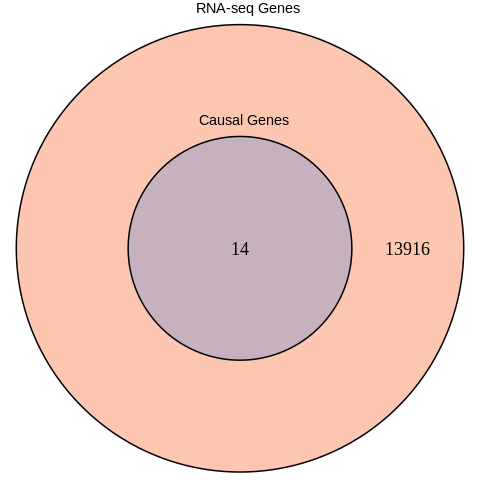

In [ ]:
%%R
# Call the first function to find common genes between the RNA-seq and the GWAS1_fs Mt_Robin datasets:
find_common_genes(path_PASC_case_subset = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/PASC_case_subset_subjects_pcgenes.txt",
                  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
                  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/common_genes_gwas1fs_proc2.txt")

In [ ]:
%%R
# Call the second function to filter the genes in the PPI:
filter_ppi_genes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/ppi_network.dat",
                path_common_genes_recheck = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/common_genes_gwas1fs_proc2.txt",
                output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/filtered_ppi_network_gwas1fs_proc2.dat")

[1] "Common genes in Input_Gene column:"
[1] "NDUFA6" "BNIP1"  "EIF5A"  "CDA"   
[1] "Common genes in Output_Gene column:"
[1] "CDA"    "EIF5A"  "NDUFA6" "BNIP1" 
[1] "Common genes in PPI dataset and Mt_Robin/RNA-seq results:"
[1] 11  2
      Input_Gene Output_Gene
990       NDUFA6       TBPL1
1510       KPNA2         CDA
11463      BNIP1      BCL2L1
12934      EIF5A        XPO1
14671       TGM2       EIF5A
19539      BNIP1        BCL2
25147       BAT3      NDUFA6
27760     NDUFA6      ATP5J2
28971       XRN2       EIF5A
29980      STX18       BNIP1
31721        CDA      ZNF598


Run Controllability Analysis:

**WSL:**

1. Using a terminal, go to the ControllabilityAnalysis_v1.0 folder:

`/mnt/c/Users/pinsy007/OneDrive - University of South Australia/PhD/Experiments/MR_MtRobin/5_Workflow/Long_COVID/ControllabilityAnalysis/ControllabilityAnalysis_v1.0`

2. Run the following commands in the following order:

```
# Give execute permission to the Parse program, making it executable
chmod +x Parse

# Give execute permission to the ControllabilityAnalysis program, making it executable
chmod +x ControllabilityAnalysis

# Execute the Parse program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./Parse filtered_ppi_network_gwas2fs_proc2.dat

# Execute the ControllabilityAnalysis program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./ControllabilityAnalysis filtered_ppi_network_gwas2fs_proc2.dat

# Use the make utility to invoke the clean target in the Makefile, which typically removes all compiled object files and executables, cleaning up the directory
make clean
```

**Obs.:** In iOS, run the commands directly, without compiling anything.

In [ ]:
%%R
# Use the third funtion to print the results:
check_files(path_nodemap = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/filtered_ppi_network_gwas1fs_proc2.dat.nodemap",
           path_output_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/filtered_ppi_network_gwas1fs_proc2.dat.output",
           path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/filtered_ppi_network_gwas1fs_proc2.dat.nodetype",
           path_linktype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/filtered_ppi_network_gwas1fs_proc2.dat.linktype")

[1] 14  2
  X0 NDUFA6
1  1  TBPL1
2  2  KPNA2
3  3    CDA
4  4  BNIP1
5  5 BCL2L1
6  6  EIF5A
[1]  1 25
  V1 V2      V3 V4       V5       V6  V7       V8       V9 V10      V11
1 15 11 1.46667  7 0.466667 0.266667 0.4 0.333333 0.333333 0.4 0.266667
       V12 V13      V14 V15 V16 V17 V18     V19     V20      V21      V22
1 0.454545   0 0.545455   0   0   0   0 1.66667 1.66667 0.141421 0.133333
       V23       V24       V25
1 0.333333 0.0666667 0.0666667
[1] 15  6
      V1 V2 V3 V4 V5 V6
1 NDUFA6  3  1  2  0  1
2  TBPL1  1  1  0  1  2
3  KPNA2  1  0  1  2  0
4    CDA  2  1  1  0  1
5  BNIP1  3  1  2  0  1
6 BCL2L1  1  1  0  1  2
[1] 10  3
  NDUFA6  TBPL1 X2
1  KPNA2    CDA  0
2  BNIP1 BCL2L1  2
3  EIF5A   XPO1  0
4   TGM2  EIF5A  2
5  BNIP1   BCL2  2
6   BAT3 NDUFA6  0


In [ ]:
%%R
# Use the fourth funtion to interpret the results:
interpret_critical_nodes(path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/filtered_ppi_network_gwas1fs_proc2.dat.nodetype",
                         path_output_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeI_gwas1fs_procedure2.txt",
                         path_output_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeII_gwas1fs_procedure2.txt")

[1] 4 6
    Name K Kin Kout TypeI TypeII
1 NDUFA6 3   1    2     0      1
4    CDA 2   1    1     0      1
5  BNIP1 3   1    2     0      1
7  EIF5A 3   2    1     0      1
[1] 5 6
    Name K Kin Kout TypeI TypeII
3  KPNA2 1   0    1     2      0
9   TGM2 1   0    1     1      0
11  BAT3 1   0    1     2      0
13  XRN2 1   0    1     1      0
14 STX18 1   0    1     2      0
Number of critical nodes (Type-I): 4 
Number of critical nodes (Type-II): 5 


In [ ]:
%%R
# Call the fifth function to visualize the results:
visualize_critical_nodes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI.xls",
                         path_critical_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeI_gwas1fs_procedure2.txt",
                         path_critical_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeII_gwas1fs_procedure2.txt")

  could not find function "graph_from_data_frame"




Error in graph_from_data_frame(ppi_data, directed = TRUE) : 
  could not find function "graph_from_data_frame"


RInterpreterError: Failed to parse and evaluate line '# Call the fifth function to visualize the results:\nvisualize_critical_nodes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI.xls",\n                         path_critical_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeI_gwas1fs_procedure2.txt",\n                         path_critical_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeII_gwas1fs_procedure2.txt")\n'.
R error message: 'Error in graph_from_data_frame(ppi_data, directed = TRUE) : \n  could not find function "graph_from_data_frame"'

In [ ]:
%%R
# Call the sixth function to verify if the common critical nodes are causal genes (checking the beta_value column): Type I causal/critical genes
analyze_critical_genesI(path_critical_nodes_I = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeI_gwas1fs_procedure2.txt",
                        path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
                        output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/causal_critical_genes_TypeI_gwas1fs_procedure2.txt")

[1]  4 24
          gene_id gene_name SNPs
1 ENSG00000132507     EIF5A    2
2 ENSG00000184983    NDUFA6    2
3 ENSG00000113734     BNIP1    7
4 ENSG00000158825       CDA   14
                                                                                                                                            SNPs_IDs
1                                                                                                                               rs62059195,rs7503161
2                                                                                                                               rs137139,rs139043947
3                                                                         rs10476082,rs11385449,rs35813302,rs4868243,rs5745108,rs72814178,rs77146849
4 rs10753504,rs10916784,rs10916834,rs12026680,rs12045689,rs12135822,rs1253799,rs3131712,rs3215400,rs55665119,rs66731853,rs72649199,rs818199,rs879088
  Obs    beta_y        Min    First_Q      Median   Third_Q      Max SD_RE
1  20

In [ ]:
%%R
# Call the seventh function to verify if the common critical nodes are causal genes (checking the beta_value column): Type II causal/critical genes
analyze_critical_genes_TypeII(path_critical_nodes_II = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeII_gwas1fs_procedure2.txt",
                             path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
                             output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/causal_critical_genes_TypeII_gwas1fs_procedure2.txt")

[1]  0 24
 [1] gene_id    gene_name  SNPs       SNPs_IDs   Obs        beta_y    
 [7] Min        First_Q    Median     Third_Q    Max        SD_RE     
[13] Res_SD_RE  Var_RE     Res_Var_RE SE_FE      t_value_FE REML      
[19] p_value    FDR        CI_lower   CI_upper   tissues    categories
<0 rows> (or 0-length row.names)


In [ ]:
%%R
# Call the eighth function to combine the critical genes I and II and to verify if the common critical nodes are causal genes (checking the beta_value column):
analyze_combined_critical_genes(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeI_gwas1fs_procedure2.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeII_gwas1fs_procedure2.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
  output_combined_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeI_TypeII_gwas1fs_procedure2.txt",
  output_top10_genes = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/causal_critical_genes_combined_gwas1fs_procedure2.txt"
)

[1]  4 24
          gene_id gene_name SNPs
1 ENSG00000132507     EIF5A    2
2 ENSG00000184983    NDUFA6    2
3 ENSG00000113734     BNIP1    7
4 ENSG00000158825       CDA   14
                                                                                                                                            SNPs_IDs
1                                                                                                                               rs62059195,rs7503161
2                                                                                                                               rs137139,rs139043947
3                                                                         rs10476082,rs11385449,rs35813302,rs4868243,rs5745108,rs72814178,rs77146849
4 rs10753504,rs10916784,rs10916834,rs12026680,rs12045689,rs12135822,rs1253799,rs3131712,rs3215400,rs55665119,rs66731853,rs72649199,rs818199,rs879088
  Obs    beta_y        Min    First_Q      Median   Third_Q      Max SD_RE
1  20

## **GWAS2-fs**

Number of unique genes in PASC before overlapping: 13930 
Number of unique genes in Mt_Robin before overlapping: 19 
Number of common genes: 18 
Number of genes unique to PASC after overlapping: 13912 
Number of genes unique to Mt_Robin after overlapping: 1 


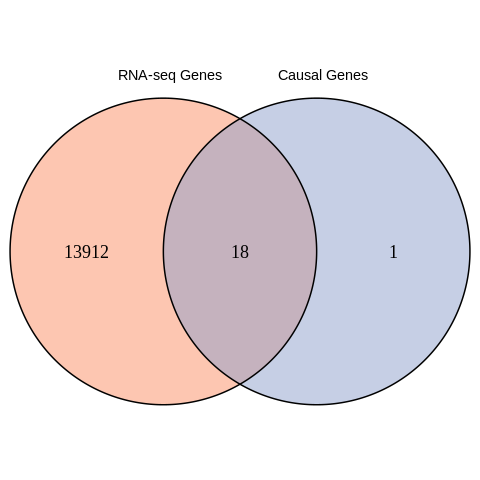

In [ ]:
%%R
# Call the first function to find common genes between the RNA-seq and the GWAS1_fs Mt_Robin datasets:
find_common_genes(path_PASC_case_subset = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/PASC_case_subset_subjects_pcgenes.txt",
                  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
                  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/common_genes_gwas2fs_proc2.txt")

In [ ]:
%%R
# Call the second function to filter the genes in the PPI:
filter_ppi_genes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/ppi_network.dat",
                path_common_genes_recheck = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/common_genes_gwas2fs_proc2.txt",
                output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/filtered_ppi_network_gwas2fs_proc2.dat")

[1] "Common genes in Input_Gene column:"
[1] "WDR73"  "MPDZ"   "ERCC3"  "APIP"   "COL6A1"
[1] "Common genes in Output_Gene column:"
[1] "WDR73"  "ERCC3"  "COL6A1" "APIP"   "MPDZ"  
[1] "Common genes in PPI dataset and Mt_Robin/RNA-seq results:"
[1] 40  2
      Input_Gene Output_Gene
3461        SMN1       WDR73
4351       WDR73     TSC22D1
4357      GTF2H1       ERCC3
5882       PSMC5       ERCC3
7603        MPDZ        RNF5
8134        MPDZ      CAMK2A
8654       WDR73      DAZAP2
10335     COL2A1      COL6A1
10856      ERCC3       PSMC5
11216       MPDZ     SYNGAP1
11447       CDK7       ERCC3
12036       MPDZ       CLDN1
12127     GTF2E2       ERCC3
13204      ANXA7       WDR73
13330      MNAT1       ERCC3
14743        VIM        APIP
15075        BCR       ERCC3
15091       APIP        LNX1
16218       MPDZ        F11R
16714       MPDZ       CSPG4
18897       MPDZ       ABCA1
19596       TP53       ERCC3
19948       MPDZ     PLEKHA1
22041      ERCC3      GTF2H2
22080        TK1    

Run Controllability Analysis:

**WSL:**

1. Using a terminal, go to the ControllabilityAnalysis_v1.0 folder:

`/mnt/c/Users/pinsy007/OneDrive - University of South Australia/PhD/Experiments/MR_MtRobin/5_Workflow/Long_COVID/ControllabilityAnalysis/ControllabilityAnalysis_v1.0`

2. Run the following commands in the following order:

```
# Give execute permission to the Parse program, making it executable
chmod +x Parse

# Give execute permission to the ControllabilityAnalysis program, making it executable
chmod +x ControllabilityAnalysis

# Execute the Parse program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./Parse filtered_ppi_network_gwas2fs_proc2.dat

# Execute the ControllabilityAnalysis program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./ControllabilityAnalysis filtered_ppi_network_gwas2fs_proc2.dat

# Use the make utility to invoke the clean target in the Makefile, which typically removes all compiled object files and executables, cleaning up the directory
make clean
```

**Obs.:** In iOS, run the commands directly, without compiling anything.

In [ ]:
%%R
# Use the third funtion to print the results:
check_files(path_nodemap = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/filtered_ppi_network_gwas2fs_proc2.dat.nodemap",
           path_output_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/filtered_ppi_network_gwas2fs_proc2.dat.output",
           path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/filtered_ppi_network_gwas2fs_proc2.dat.nodetype",
           path_linktype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/filtered_ppi_network_gwas2fs_proc2.dat.linktype")

[1] 42  2
  X0    SMN1
1  1   WDR73
2  2 TSC22D1
3  3  GTF2H1
4  4   ERCC3
5  5   PSMC5
6  6    MPDZ
[1]  1 25
  V1 V2      V3 V4       V5       V6       V7        V8       V9      V10
1 43 40 1.86047 33 0.767442 0.116279 0.813953 0.0697674 0.418605 0.162791
       V11   V12 V13   V14 V15 V16 V17 V18     V19     V20       V21       V22
1 0.418605 0.075   0 0.925   0   0   0   0 5.44186 5.44186 0.0232561 0.0771309
       V23 V24      V25
1 0.418605   0 0.348837
[1] 43  6
       V1 V2 V3 V4 V5 V6
1    SMN1  1  0  1  1  0
2   WDR73  7  4  3  0  1
3 TSC22D1  1  1  0  1  2
4  GTF2H1  1  0  1  1  0
5   ERCC3 17 11  6  0  1
6   PSMC5  2  1  1  1  2
[1] 39  3
    SMN1   WDR73 X2
1  WDR73 TSC22D1  2
2 GTF2H1   ERCC3  2
3  PSMC5   ERCC3  2
4   MPDZ    RNF5  2
5   MPDZ  CAMK2A  2
6  WDR73  DAZAP2  2


In [ ]:
%%R
# Use the fourth funtion to interpret the results:
interpret_critical_nodes(path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/filtered_ppi_network_gwas2fs_proc2.dat.nodetype",
                         path_output_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeI_gwas2fs_procedure2.txt",
                         path_output_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeII_gwas2fs_procedure2.txt")

[1] 5 6
     Name  K Kin Kout TypeI TypeII
2   WDR73  7   4    3     0      1
5   ERCC3 17  11    6     0      1
7    MPDZ 11   2    9     0      1
12 COL6A1  3   2    1     0      1
20   APIP  2   1    1     0      1
[1] 18  6
     Name K Kin Kout TypeI TypeII
1    SMN1 1   0    1     1      0
4  GTF2H1 1   0    1     1      0
11 COL2A1 1   0    1     1      0
14   CDK7 1   0    1     1      0
17  ANXA7 1   0    1     1      0
18  MNAT1 1   0    1     1      0
Number of critical nodes (Type-I): 5 
Number of critical nodes (Type-II): 18 


In [ ]:
%%R
# Call the fifth function to visualize the results:
visualize_critical_nodes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI.xls",
                         path_critical_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeI_gwas2fs_procedure2.txt",
                         path_critical_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeII_gwas2fs_procedure2.txt")

In [ ]:
%%R
# Call the sixth function to verify if the common critical nodes are causal genes (checking the beta_value column): Type I causal/critical genes
analyze_critical_genesI(path_critical_nodes_I = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeI_gwas2fs_procedure2.txt",
                        path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
                        output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/causal_critical_genes_TypeI_gwas2fs_process2.txt")

[1]  5 24
          gene_id gene_name SNPs
1 ENSG00000149089      APIP    4
2 ENSG00000163161     ERCC3    5
3 ENSG00000142156    COL6A1   22
4 ENSG00000177082     WDR73   13
5 ENSG00000107186      MPDZ   18
                                                                                                                                                                                                                                     SNPs_IDs
1                                                                                                                                                                                                  rs11032943,rs11500295,rs2915228,rs74344381
2                                                                                                                                                                                        rs11688763,rs4150476,rs56369397,rs7568261,rs76693372
3 rs1053315,rs113777625,rs11700719,rs11701124,rs117025791,rs11702647,rs1180637

In [ ]:
%%R
# Call the seventh function to verify if the common critical nodes are causal genes (checking the beta_value column): Type II causal/critical genes
analyze_critical_genes_TypeII(path_critical_nodes_II = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeII_gwas2fs_procedure2.txt",
                             path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
                             output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/causal_critical_genes_TypeII_gwas2fs_process2.txt")

[1]  0 24
 [1] gene_id    gene_name  SNPs       SNPs_IDs   Obs        beta_y    
 [7] Min        First_Q    Median     Third_Q    Max        SD_RE     
[13] Res_SD_RE  Var_RE     Res_Var_RE SE_FE      t_value_FE REML      
[19] p_value    FDR        CI_lower   CI_upper   tissues    categories
<0 rows> (or 0-length row.names)


In [ ]:
%%R
# Call the eighth function to combine the critical genes I and II and to verify if the common critical nodes are causal genes (checking the beta_value column):
analyze_combined_critical_genes(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeI_gwas2fs_procedure2.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeII_gwas2fs_procedure2.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
  output_combined_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeI_TypeII_gwas2fs_procedure2.txt",
  output_top10_genes = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/causal_critical_genes_combined_gwas2fs_procedure2.txt"
)

[1]  5 24
          gene_id gene_name SNPs
1 ENSG00000149089      APIP    4
2 ENSG00000163161     ERCC3    5
3 ENSG00000142156    COL6A1   22
4 ENSG00000177082     WDR73   13
5 ENSG00000107186      MPDZ   18
                                                                                                                                                                                                                                     SNPs_IDs
1                                                                                                                                                                                                  rs11032943,rs11500295,rs2915228,rs74344381
2                                                                                                                                                                                        rs11688763,rs4150476,rs56369397,rs7568261,rs76693372
3 rs1053315,rs113777625,rs11700719,rs11701124,rs117025791,rs11702647,rs1180637

## **GWAS3-fs**

Number of unique genes in PASC before overlapping: 13930 
Number of unique genes in Mt_Robin before overlapping: 10 
Number of common genes: 7 
Number of genes unique to PASC after overlapping: 13923 
Number of genes unique to Mt_Robin after overlapping: 3 


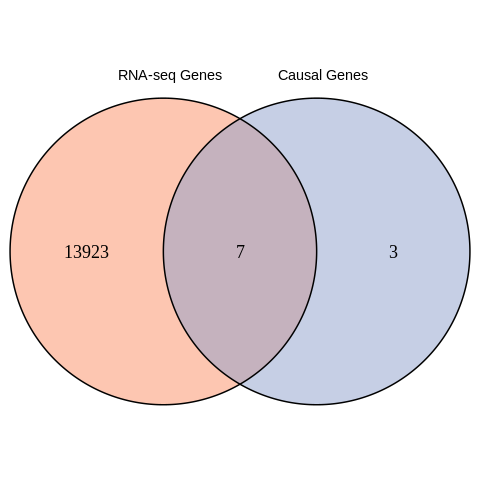

In [ ]:
%%R
# Call the first function to find common genes between the RNA-seq and the GWAS3_fs Mt_Robin datasets:
find_common_genes(path_PASC_case_subset = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/PASC_case_subset_subjects_pcgenes.txt",
                  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
                  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/common_genes_gwas3fs_proc2.txt")

In [ ]:
%%R
# Call the second function to filter the genes in the PPI:
filter_ppi_genes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/ppi_network.dat",
                path_common_genes_recheck = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/common_genes_gwas3fs_proc2.txt",
                output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/filtered_ppi_network_gwas3fs_proc2.dat")

[1] "Common genes in Input_Gene column:"
[1] "NDUFA6" "MED19"  "FBF1"   "CDA"   
[1] "Common genes in Output_Gene column:"
[1] "MED19"  "CDA"    "FBF1"   "NDUFA6"
[1] "Common genes in PPI dataset and Mt_Robin/RNA-seq results:"
[1] 27  2
      Input_Gene Output_Gene
990       NDUFA6       TBPL1
1310       RADIL       MED19
1328         DCK       MED19
1510       KPNA2         CDA
7852       MED19       MED17
8914       MED19        MED8
12777       FBF1        GCC1
12984       FBF1     TUBGCP4
13162       FBF1      USHBP1
13605       FBF1      TRIM29
15160      MED19        MED9
17636       GAB2       MED19
18737        FAS        FBF1
22943       FBF1      TRIM27
24025       FBF1       TCEA2
24459     NFKBIA       MED19
24920       FBF1       IFT20
25147       BAT3      NDUFA6
25270       FBF1    CALCOCO2
27760     NDUFA6      ATP5J2
27884      TRAF2        FBF1
28133      MED31       MED19
29319       FBF1      HIF1AN
29320       FBF1      RHOXF2
31044      MED19       MED27
31721    

Run Controllability Analysis:

**WSL:**

1. Using a terminal, go to the ControllabilityAnalysis_v1.0 folder:

`/mnt/c/Users/pinsy007/OneDrive - University of South Australia/PhD/Experiments/MR_MtRobin/5_Workflow/Long_COVID/ControllabilityAnalysis/ControllabilityAnalysis_v1.0`

2. Run the following commands in the following order:

```
# Give execute permission to the Parse program, making it executable
chmod +x Parse

# Give execute permission to the ControllabilityAnalysis program, making it executable
chmod +x ControllabilityAnalysis

# Execute the Parse program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./Parse filtered_ppi_network_gwas2fs_proc2.dat

# Execute the ControllabilityAnalysis program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./ControllabilityAnalysis filtered_ppi_network_gwas2fs_proc2.dat

# Use the make utility to invoke the clean target in the Makefile, which typically removes all compiled object files and executables, cleaning up the directory
make clean
```

**Obs.:** In iOS, run the commands directly, without compiling anything.

In [ ]:
%%R
# Use the third funtion to print the results:
check_files(path_nodemap = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/filtered_ppi_network_gwas3fs_proc2.dat.nodemap",
           path_output_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/filtered_ppi_network_gwas3fs_proc2.dat.output",
           path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/filtered_ppi_network_gwas3fs_proc2.dat.nodetype",
           path_linktype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/filtered_ppi_network_gwas3fs_proc2.dat.linktype")

[1] 30  2
  X0 NDUFA6
1  1  TBPL1
2  2  RADIL
3  3  MED19
4  4    DCK
5  5  KPNA2
6  6    CDA
[1]  1 25
  V1 V2      V3 V4       V5       V6       V7        V8       V9     V10
1 31 27 1.74194 23 0.741935 0.129032 0.774194 0.0967742 0.290323 0.16129
       V11      V12 V13      V14 V15 V16 V17 V18     V19     V20      V21
1 0.548387 0.111111   0 0.888889   0   0   0   0 3.77419 3.77419 0.106988
        V22      V23      V24     V25
1 0.0322581 0.290323 0.290323 0.16129
[1] 31  6
      V1 V2 V3 V4 V5 V6
1 NDUFA6  3  1  2  0  1
2  TBPL1  1  1  0  1  2
3  RADIL  1  0  1  1  0
4  MED19  9  5  4  0  1
5    DCK  1  0  1  1  0
6  KPNA2  1  0  1  2  0
[1] 26  3
  NDUFA6 TBPL1 X2
1  RADIL MED19  2
2    DCK MED19  2
3  KPNA2   CDA  0
4  MED19 MED17  2
5  MED19  MED8  2
6   FBF1  GCC1  2


In [ ]:
%%R
# Use the fourth funtion to interpret the results:
interpret_critical_nodes(path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/filtered_ppi_network_gwas3fs_proc2.dat.nodetype",
                         path_output_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeI_gwas3fs_procedure2.txt",
                         path_output_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeII_gwas3fs_procedure2.txt")

[1] 4 6
     Name  K Kin Kout TypeI TypeII
1  NDUFA6  3   1    2     0      1
4   MED19  9   5    4     0      1
7     CDA  2   1    1     0      1
10   FBF1 13   2   11     0      1
[1] 9 6
     Name K Kin Kout TypeI TypeII
3   RADIL 1   0    1     1      0
5     DCK 1   0    1     1      0
6   KPNA2 1   0    1     2      0
16   GAB2 1   0    1     1      0
17    FAS 1   0    1     1      0
20 NFKBIA 1   0    1     1      0
Number of critical nodes (Type-I): 4 
Number of critical nodes (Type-II): 9 


In [ ]:
%%R
# Call the fifth function to visualize the results:
visualize_critical_nodes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI.xls",
                         path_critical_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeI_gwas3fs_procedure2.txt",
                         path_critical_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeII_gwas3fs_procedure2.txt")

In [ ]:
%%R
# Call the sixth function to verify if the common critical nodes are causal genes (checking the beta_value column): Type I causal/critical genes
analyze_critical_genesI(path_critical_nodes_I = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeI_gwas3fs_procedure2.txt",
                        path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
                        output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/causal_critical_genes_TypeI_gwas3fs_process2.txt")

[1]  4 24
          gene_id gene_name SNPs
1 ENSG00000188878      FBF1    5
2 ENSG00000184983    NDUFA6    2
3 ENSG00000158825       CDA   14
4 ENSG00000156603     MED19   14
                                                                                                                                                SNPs_IDs
1                                                                                                  rs1135889,rs115872616,rs140602544,rs8074216,rs9674908
2                                                                                                                                   rs137139,rs139043947
3     rs10753504,rs10916784,rs10916834,rs12026680,rs12045689,rs12135822,rs1253799,rs3131712,rs3215400,rs55665119,rs66731853,rs72649199,rs818199,rs879088
4 rs11229259,rs11601607,rs117394301,rs117732092,rs12801976,rs141274831,rs17151811,rs1783818,rs200563414,rs2244169,rs4938870,rs501738,rs527528,rs80244775
  Obs    beta_y        Min    First_Q      Median   Third_Q 

In [ ]:
%%R
# Call the seventh function to verify if the common critical nodes are causal genes (checking the beta_value column): Type II causal/critical genes
analyze_critical_genes_TypeII(path_critical_nodes_II = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeII_gwas3fs_procedure2.txt",
                             path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
                             output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/causal_critical_genes_TypeII_gwas3fs_process2.txt")

[1]  0 24
 [1] gene_id    gene_name  SNPs       SNPs_IDs   Obs        beta_y    
 [7] Min        First_Q    Median     Third_Q    Max        SD_RE     
[13] Res_SD_RE  Var_RE     Res_Var_RE SE_FE      t_value_FE REML      
[19] p_value    FDR        CI_lower   CI_upper   tissues    categories
<0 rows> (or 0-length row.names)


In [ ]:
%%R
# Call the eighth function to combine the critical genes I and II and to verify if the common critical nodes are causal genes (checking the beta_value column):
analyze_combined_critical_genes(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeI_gwas3fs_procedure2.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeII_gwas3fs_procedure2.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
  output_combined_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeI_TypeII_gwas3fs_procedure2.txt",
  output_top10_genes = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/causal_critical_genes_combined_gwas3fs_procedure2.txt"
)

[1]  4 24
          gene_id gene_name SNPs
1 ENSG00000188878      FBF1    5
2 ENSG00000184983    NDUFA6    2
3 ENSG00000158825       CDA   14
4 ENSG00000156603     MED19   14
                                                                                                                                                SNPs_IDs
1                                                                                                  rs1135889,rs115872616,rs140602544,rs8074216,rs9674908
2                                                                                                                                   rs137139,rs139043947
3     rs10753504,rs10916784,rs10916834,rs12026680,rs12045689,rs12135822,rs1253799,rs3131712,rs3215400,rs55665119,rs66731853,rs72649199,rs818199,rs879088
4 rs11229259,rs11601607,rs117394301,rs117732092,rs12801976,rs141274831,rs17151811,rs1783818,rs200563414,rs2244169,rs4938870,rs501738,rs527528,rs80244775
  Obs    beta_y        Min    First_Q      Median   Third_Q 

## **GWAS4-fs**

Number of unique genes in PASC before overlapping: 13930 
Number of unique genes in Mt_Robin before overlapping: 24 
Number of common genes: 23 
Number of genes unique to PASC after overlapping: 13907 
Number of genes unique to Mt_Robin after overlapping: 1 


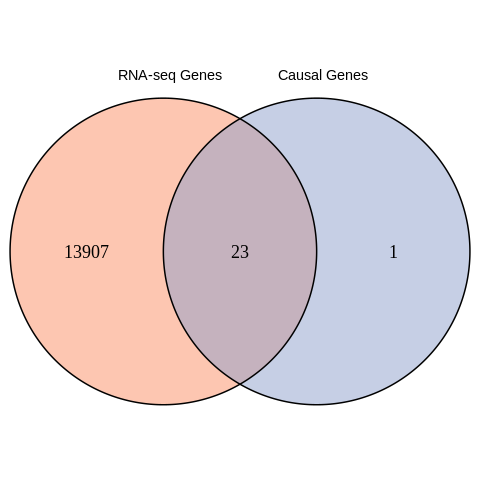

In [ ]:
%%R
# Call the first function to find common genes between the RNA-seq and the GWAS4_fs Mt_Robin datasets:
find_common_genes(path_PASC_case_subset = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/PASC_case_subset_subjects_pcgenes.txt",
                  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
                  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/common_genes_gwas4fs_proc2.txt")

In [ ]:
%%R
# Call the second function to filter the genes in the PPI:
filter_ppi_genes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/ppi_network.dat",
                path_common_genes_recheck = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/common_genes_gwas4fs_proc2.txt",
                output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/filtered_ppi_network_gwas4fs_proc2.dat")

[1] "Common genes in Input_Gene column:"
[1] "IMMT"    "PSMF1"   "WDR73"   "COX17"   "SUPT4H1" "ERCC3"   "APIP"   
[1] "Common genes in Output_Gene column:"
[1] "COX17"   "IMMT"    "WDR73"   "ERCC3"   "PSMF1"   "SUPT4H1" "APIP"   
[1] "Common genes in PPI dataset and Mt_Robin/RNA-seq results:"
[1] 100   2
      Input_Gene Output_Gene
227         IMMT        NEK2
474        PSMF1     CCDC85B
1167       COPS6       COX17
1630        IMMT       FUBP1
1793        IMMT        CCT5
2408      EEF1A1        IMMT
3135     C8orf33        IMMT
3461        SMN1       WDR73
3681        IMMT       CSTF2
4351       WDR73     TSC22D1
4357      GTF2H1       ERCC3
4791        IMMT    C1orf103
5038    C1orf103        IMMT
5382       HOOK2       PSMF1
5555       COX17    C1orf103
5809        RER1        IMMT
5882       PSMC5       ERCC3
6256      EEF1A1       COX17
6775      UNC119       COX17
7122     SUPT4H1      SUPT5H
7974        IMMT        STX5
8654       WDR73      DAZAP2
9694        IMMT        BM

Run Controllability Analysis:

**WSL:**

1. Using a terminal, go to the ControllabilityAnalysis_v1.0 folder:

`/mnt/c/Users/pinsy007/OneDrive - University of South Australia/PhD/Experiments/MR_MtRobin/5_Workflow/Long_COVID/ControllabilityAnalysis/ControllabilityAnalysis_v1.0`

2. Run the following commands in the following order:

```
# Give execute permission to the Parse program, making it executable
chmod +x Parse

# Give execute permission to the ControllabilityAnalysis program, making it executable
chmod +x ControllabilityAnalysis

# Execute the Parse program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./Parse filtered_ppi_network_gwas2fs_proc2.dat

# Execute the ControllabilityAnalysis program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./ControllabilityAnalysis filtered_ppi_network_gwas2fs_proc2.dat

# Use the make utility to invoke the clean target in the Makefile, which typically removes all compiled object files and executables, cleaning up the directory
make clean
```

**Obs.:** In iOS, run the commands directly, without compiling anything.

In [ ]:
%%R
# Use the third funtion to print the results:
check_files(path_nodemap = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/filtered_ppi_network_gwas4fs_proc2.dat.nodemap",
           path_output_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/filtered_ppi_network_gwas4fs_proc2.dat.output",
           path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/filtered_ppi_network_gwas4fs_proc2.dat.nodetype",
           path_linktype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/filtered_ppi_network_gwas4fs_proc2.dat.linktype")

[1] 95  2
  X0    IMMT
1  1    NEK2
2  2   PSMF1
3  3 CCDC85B
4  4   COPS6
5  5   COX17
6  6   FUBP1
[1]  1 25
  V1  V2      V3 V4       V5        V6       V7      V8     V9     V10     V11
1 96 100 2.08333 82 0.854167 0.0729167 0.895833 0.03125 0.4375 0.09375 0.46875
   V12 V13  V14 V15 V16 V17 V18     V19     V20       V21       V22    V23 V24
1 0.03   0 0.97   0   0   0   0 22.3646 22.3646 0.0554518 0.0108585 0.4375   0
       V25
1 0.416667
[1] 96  6
       V1 V2 V3 V4 V5 V6
1    IMMT 42 14 28  0  1
2    NEK2  1  1  0  1  2
3   PSMF1 15 11  4  0  1
4 CCDC85B  1  1  0  1  2
5   COPS6  2  1  1  1  2
6   COX17  9  4  5  0  1
[1] 99  3
     IMMT    NEK2 X2
1   PSMF1 CCDC85B  2
2   COPS6   COX17  2
3    IMMT   FUBP1  2
4    IMMT    CCT5  2
5  EEF1A1    IMMT  2
6 C8orf33    IMMT  2


In [ ]:
%%R
# Use the fourth funtion to interpret the results:
interpret_critical_nodes(path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/filtered_ppi_network_gwas4fs_proc2.dat.nodetype",
                         path_output_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeI_gwas4fs_procedure2.txt",
                         path_output_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeII_gwas4fs_procedure2.txt")

[1] 7 6
      Name  K Kin Kout TypeI TypeII
1     IMMT 42  14   28     0      1
3    PSMF1 15  11    4     0      1
6    COX17  9   4    5     0      1
12   WDR73  7   4    3     0      1
16   ERCC3 17  11    6     0      1
22 SUPT4H1  8   7    1     0      1
[1] 42  6
      Name K Kin Kout TypeI TypeII
9   EEF1A1 2   0    2     1      0
10 C8orf33 1   0    1     1      0
15  GTF2H1 1   0    1     1      0
18   HOOK2 1   0    1     1      0
19    RER1 1   0    1     1      0
21  UNC119 1   0    1     1      0
Number of critical nodes (Type-I): 7 
Number of critical nodes (Type-II): 42 


In [ ]:
%%R
# Call the fifth function to visualize the results:
visualize_critical_nodes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI.xls",
                         path_critical_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeI_gwas4fs_procedure2.txt",
                         path_critical_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeII_gwas4fs_procedure2.txt")

In [ ]:
%%R
# Call the sixth function to verify if the common critical nodes are causal genes (checking the beta_value column): Type I causal/critical genes
analyze_critical_genesI(path_critical_nodes_I = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeI_gwas4fs_procedure2.txt",
                        path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
                        output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/causal_critical_genes_TypeI_gwas4fs_process2.txt")

[1]  7 24
          gene_id gene_name SNPs
1 ENSG00000149089      APIP    4
2 ENSG00000163161     ERCC3    5
3 ENSG00000177082     WDR73   13
4 ENSG00000125818     PSMF1    9
5 ENSG00000213246   SUPT4H1   12
6 ENSG00000138495     COX17   18
7 ENSG00000132305      IMMT    7
                                                                                                                                                                                         SNPs_IDs
1                                                                                                                                                      rs11032943,rs11500295,rs2915228,rs74344381
2                                                                                                                                            rs11688763,rs4150476,rs56369397,rs7568261,rs76693372
3                                                     rs11259919,rs12900358,rs138567963,rs141005445,rs17532346,rs1960770,rs2137270,rs55702300,rs

In [ ]:
%%R
# Call the seventh function to verify if the common critical nodes are causal genes (checking the beta_value column): Type II causal/critical genes
analyze_critical_genes_TypeII(path_critical_nodes_II = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeII_gwas4fs_procedure2.txt",
                             path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
                             output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/causal_critical_genes_TypeII_gwas4fs_process2.txt")

[1]  0 24
 [1] gene_id    gene_name  SNPs       SNPs_IDs   Obs        beta_y    
 [7] Min        First_Q    Median     Third_Q    Max        SD_RE     
[13] Res_SD_RE  Var_RE     Res_Var_RE SE_FE      t_value_FE REML      
[19] p_value    FDR        CI_lower   CI_upper   tissues    categories
<0 rows> (or 0-length row.names)


In [ ]:
%%R
# Call the eighth function to combine the critical genes I and II and to verify if the common critical nodes are causal genes (checking the beta_value column):
analyze_combined_critical_genes(path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeI_gwas4fs_procedure2.txt",
                                path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeII_gwas4fs_procedure2.txt",
                                path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
                                output_combined_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeI_TypeII_gwas4fs_procedure2.txt",
                                output_top10_genes = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/causal_critical_genes_combined_gwas4fs_procedure2.txt")

[1]  7 24
          gene_id gene_name SNPs
1 ENSG00000149089      APIP    4
2 ENSG00000163161     ERCC3    5
3 ENSG00000177082     WDR73   13
4 ENSG00000125818     PSMF1    9
5 ENSG00000213246   SUPT4H1   12
6 ENSG00000138495     COX17   18
7 ENSG00000132305      IMMT    7
                                                                                                                                                                                         SNPs_IDs
1                                                                                                                                                      rs11032943,rs11500295,rs2915228,rs74344381
2                                                                                                                                            rs11688763,rs4150476,rs56369397,rs7568261,rs76693372
3                                                     rs11259919,rs12900358,rs138567963,rs141005445,rs17532346,rs1960770,rs2137270,rs55702300,rs

## **ALL GWAS**

Number of unique genes in PASC before overlapping: 13930 
Number of unique genes in Mt_Robin before overlapping: 50 
Number of common genes: 45 
Number of genes unique to PASC after overlapping: 13885 
Number of genes unique to Mt_Robin after overlapping: 5 


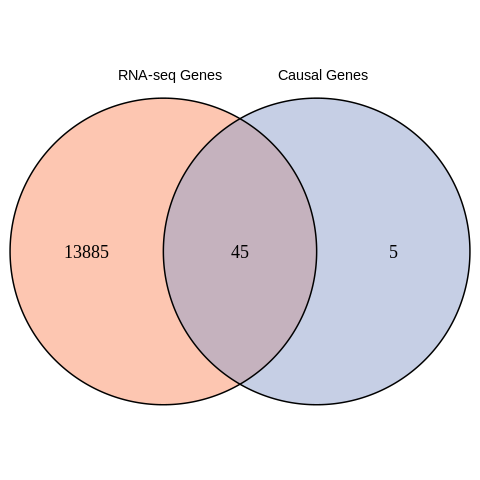

In [ ]:
%%R
# Call the first function to find common genes between the RNA-seq and the GWAS1_fs Mt_Robin datasets:
find_common_genes(path_PASC_case_subset = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/PASC_case_subset_subjects_pcgenes.txt",
                  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
                  output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/common_genes_all_gwas_proc2.txt")

In [ ]:
%%R
# Call the second function to filter the genes in the PPI:
filter_ppi_genes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/ppi_network.dat",
                path_common_genes_recheck = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/common_genes_all_gwas_proc2.txt",
                output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/filtered_ppi_network_all_gwas_proc2.dat")

[1] "Common genes in Input_Gene column:"
 [1] "IMMT"    "PSMF1"   "NDUFA6"  "WDR73"   "COX17"   "SUPT4H1" "MPDZ"   
 [8] "MED19"   "ERCC3"   "BNIP1"   "FBF1"    "EIF5A"   "APIP"    "COL6A1" 
[15] "CDA"    
[1] "Common genes in Output_Gene column:"
 [1] "COX17"   "MED19"   "CDA"     "IMMT"    "WDR73"   "ERCC3"   "PSMF1"  
 [8] "SUPT4H1" "COL6A1"  "EIF5A"   "APIP"    "FBF1"    "NDUFA6"  "BNIP1"  
[15] "MPDZ"   
[1] "Common genes in PPI dataset and Mt_Robin/RNA-seq results:"
[1] 147   2
      Input_Gene Output_Gene
227         IMMT        NEK2
474        PSMF1     CCDC85B
990       NDUFA6       TBPL1
1167       COPS6       COX17
1310       RADIL       MED19
1328         DCK       MED19
1510       KPNA2         CDA
1630        IMMT       FUBP1
1793        IMMT        CCT5
2408      EEF1A1        IMMT
3135     C8orf33        IMMT
3461        SMN1       WDR73
3681        IMMT       CSTF2
4351       WDR73     TSC22D1
4357      GTF2H1       ERCC3
4791        IMMT    C1orf103
5038    C1orf103  

Run Controllability Analysis:

**WSL:**

1. Using a terminal, go to the ControllabilityAnalysis_v1.0 folder:

`/mnt/c/Users/pinsy007/OneDrive - University of South Australia/PhD/Experiments/MR_MtRobin/5_Workflow/Long_COVID/ControllabilityAnalysis/ControllabilityAnalysis_v1.0`

2. Run the following commands in the following order:

```
# Give execute permission to the Parse program, making it executable
chmod +x Parse

# Give execute permission to the ControllabilityAnalysis program, making it executable
chmod +x ControllabilityAnalysis

# Execute the Parse program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./Parse filtered_ppi_network_gwas2fs_proc2.dat

# Execute the ControllabilityAnalysis program with filtered_ppi_network_gwas2fs_proc2.dat as its input file
./ControllabilityAnalysis filtered_ppi_network_gwas2fs_proc2.dat

# Use the make utility to invoke the clean target in the Makefile, which typically removes all compiled object files and executables, cleaning up the directory
make clean
```

**Obs.:** In iOS, run the commands directly, without compiling anything.

In [ ]:
%%R
# Use the third funtion to print the results:
check_files(path_nodemap = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/filtered_ppi_network_all_gwas_proc2.dat.nodemap",
           path_output_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/filtered_ppi_network_all_gwas_proc2.dat.output",
           path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/filtered_ppi_network_all_gwas_proc2.dat.nodetype",
           path_linktype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/filtered_ppi_network_all_gwas_proc2.dat.linktype")

[1] 146   2
  X0    IMMT
1  1    NEK2
2  2   PSMF1
3  3 CCDC85B
4  4  NDUFA6
5  5   TBPL1
6  6   COPS6
[1]  1 25
   V1  V2 V3  V4       V5       V6       V7        V8      V9      V10      V11
1 147 147  2 117 0.795918 0.102041 0.836735 0.0612245 0.37415 0.136054 0.489796
        V12        V13      V14 V15 V16 V17 V18     V19     V20       V21
1 0.0612245 0.00680272 0.931973   0   0   0   0 16.0272 16.0272 0.0362134
         V22     V23       V24      V25
1 0.00709128 0.37415 0.0884354 0.333333
[1] 147   6
       V1 V2 V3 V4 V5 V6
1    IMMT 42 14 28  0  1
2    NEK2  1  1  0  1  2
3   PSMF1 15 11  4  0  1
4 CCDC85B  2  2  0  1  2
5  NDUFA6  3  1  2  0  1
6   TBPL1  1  1  0  1  2
[1] 146   3
    IMMT    NEK2 X2
1  PSMF1 CCDC85B  2
2 NDUFA6   TBPL1  2
3  COPS6   COX17  2
4  RADIL   MED19  2
5    DCK   MED19  2
6  KPNA2     CDA  0


In [ ]:
%%R
# Use the fourth funtion to interpret the results:
interpret_critical_nodes(path_nodetype_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/filtered_ppi_network_all_gwas_proc2.dat.nodetype",
                         path_output_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeI_all_gwas_procedure2.txt",
                         path_output_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeII_all_gwas_procedure2.txt")

[1] 15  6
     Name  K Kin Kout TypeI TypeII
1    IMMT 42  14   28     0      1
3   PSMF1 15  11    4     0      1
5  NDUFA6  3   1    2     0      1
8   COX17  9   4    5     0      1
10  MED19  9   5    4     0      1
13    CDA  2   1    1     0      1
[1] 55  6
      Name K Kin Kout TypeI TypeII
9    RADIL 1   0    1     1      0
11     DCK 1   0    1     1      0
12   KPNA2 1   0    1     2      0
16  EEF1A1 2   0    2     1      0
17 C8orf33 1   0    1     1      0
22  GTF2H1 1   0    1     1      0
Number of critical nodes (Type-I): 15 
Number of critical nodes (Type-II): 55 


In [ ]:
%%R
# Call the fifth function to visualize the results:
visualize_critical_nodes(path_ppi_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI.xls",
                         path_critical_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeI_all_gwas_procedure2.txt",
                         path_critical_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeII_all_gwas_procedure2.txt")

In [ ]:
%%R
# Call the sixth function to verify if the common critical nodes are causal genes (checking the beta_value column): Type I causal/critical genes
analyze_critical_genesI(path_critical_nodes_I = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeI_all_gwas_procedure2.txt",
                        path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
                        output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/causal_critical_genes_TypeI_all_gwas_procedure2.txt")

[1] 20 24
           gene_id gene_name SNPs
14 ENSG00000149089      APIP    4
5  ENSG00000149089      APIP    4
1  ENSG00000132507     EIF5A    2
6  ENSG00000163161     ERCC3    5
15 ENSG00000163161     ERCC3    5
7  ENSG00000142156    COL6A1   22
8  ENSG00000177082     WDR73   13
16 ENSG00000177082     WDR73   13
10 ENSG00000188878      FBF1    5
2  ENSG00000184983    NDUFA6    2
17 ENSG00000125818     PSMF1    9
11 ENSG00000184983    NDUFA6    2
3  ENSG00000113734     BNIP1    7
12 ENSG00000158825       CDA   14
4  ENSG00000158825       CDA   14
18 ENSG00000213246   SUPT4H1   12
13 ENSG00000156603     MED19   14
19 ENSG00000138495     COX17   18
20 ENSG00000132305      IMMT    7
9  ENSG00000107186      MPDZ   18
                                                                                                                                                                                                                                      SNPs_IDs
14                                   

In [ ]:
%%R
# Call the seventh function to verify if the common critical nodes are causal genes (checking the beta_value column): Type II causal/critical genes
analyze_critical_genes_TypeII(path_critical_nodes_II = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeII_all_gwas_procedure2.txt",
                             path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
                             output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/causal_critical_genes_TypeII_all_gwas_procedure2.txt")

[1]  0 24
 [1] gene_id    gene_name  SNPs       SNPs_IDs   Obs        beta_y    
 [7] Min        First_Q    Median     Third_Q    Max        SD_RE     
[13] Res_SD_RE  Var_RE     Res_Var_RE SE_FE      t_value_FE REML      
[19] p_value    FDR        CI_lower   CI_upper   tissues    categories
<0 rows> (or 0-length row.names)


In [ ]:
%%R
# Call the eighth function to combine the critical genes I and II and to verify if the common critical nodes are causal genes (checking the beta_value column):
analyze_combined_critical_genes(
  path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeI_all_gwas_procedure2.txt",
  path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeII_all_gwas_procedure2.txt",
  path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
  output_combined_data = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeI_TypeII_all_gwas_procedure2.txt",
  output_top10_genes = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/causal_critical_genes_combined_all_gwas_procedure2.txt"
)

[1] 20 24
           gene_id gene_name SNPs
14 ENSG00000149089      APIP    4
5  ENSG00000149089      APIP    4
1  ENSG00000132507     EIF5A    2
6  ENSG00000163161     ERCC3    5
15 ENSG00000163161     ERCC3    5
7  ENSG00000142156    COL6A1   22
8  ENSG00000177082     WDR73   13
16 ENSG00000177082     WDR73   13
10 ENSG00000188878      FBF1    5
2  ENSG00000184983    NDUFA6    2
17 ENSG00000125818     PSMF1    9
11 ENSG00000184983    NDUFA6    2
3  ENSG00000113734     BNIP1    7
12 ENSG00000158825       CDA   14
4  ENSG00000158825       CDA   14
18 ENSG00000213246   SUPT4H1   12
13 ENSG00000156603     MED19   14
19 ENSG00000138495     COX17   18
20 ENSG00000132305      IMMT    7
9  ENSG00000107186      MPDZ   18
                                                                                                                                                                                                                                      SNPs_IDs
14                                   

# **Final Tables**

## **CT**

**Steps:**

1. Add the gene_id in the first column.
2. Rank the table based on the K, Kin and Kout columns.
3. Export the tables to be used by the enrichment analysis.

**Indispensable nodes:**

**Type I and Type II Genes:** This refers to the classification of nodes in the network based on their role in controlling the system.

**Type-I:**
- **Critical:** In its absence we have to control more driver nodes. For example, removing one node in the middle of a directed path will cause N_D increase.
- **Redundant:** In its absence we need to control less driver nodes. For example, removing one leaf node will decrease N_D by 1.
- **Ordinary:** In its absence we need to control the same number of driver nodes. For example, removing the central node will not change N_D at all.

**Type-II:**
- **Critical:** It belongs to all the driver node sets, i.e. we have to always control it. We can rigorously prove that a node is critical if and only if it has zero in-degree, i.e. kin=0.
- **Redundant:** It belongs to no driver node sets, so we never need to control them.
- **Ordinary:** It belongs to some but not all driver node sets.

**Columns:**
1. **K (Degree)**: Represents the total number of interactions. Genes with a higher degree might be more central to the network, meaning they interact with many other genes.
2. **Kin (In-Degree)**: Represents the number of incoming interactions. Genes with a higher in-degree might be more influenced by other genes.
3. **Kout (Out-Degree)**: Represents the number of outgoing interactions. Genes with a higher out-degree might influence many other genes.

`Name  K    Kin  Kout  Type-I  Type-II`
- Column1: node index, as used in the network
- Column2: degree
- Column3: in-degree
- Column4: out-degree
- Column5: Type-I node classification: 0 (critical), 1(redundant), 2 (ordinary)
- Column6: Type-II node classification: 0 (critical), 1(redundant), 2 (ordinary)

**Ranking:**
1. Rank by total degree (K): This would emphasize genes that have the most interactions in total.
2. Rank by out-degree (Kout): This would emphasize genes that influence many others.
3. Rank by in-degree (Kin): This would emphasize genes that are influenced by many others.

In [ ]:
%%R

# Read the input data:
ct_table <- read.table("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_TypeII_procedure1.txt", header=TRUE)
mt_robin_table <- read.table("/content/drive/MyDrive/Colab/Long_COVID/eQTL/eqtl_all_tissues_110.txt", header=TRUE)

# Add the gene_name column from the Mt_Robin result to the CT result:
gene_id <- mt_robin_table$gene_id[match(ct_table$Name, mt_robin_table$gene_name)]

# Add the gene_id column as the first column:
ct_table <- cbind(gene_id, ct_table)

# Rank by K, Kout, and Kin (all genes):
all_genes_K <- ct_table[order(-ct_table$K),]
all_genes_Kout <- ct_table[order(-ct_table$Kout),]
all_genes_Kin <- ct_table[order(-ct_table$Kin),]

# Save results:
write.table(all_genes_K, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ranking/all_genes_ranked_by_K.txt", sep="\t", row.names=FALSE, quote=FALSE)
write.table(all_genes_Kout, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ranking/all_genes_ranked_by_Kout.txt", sep="\t", row.names=FALSE, quote=FALSE)
write.table(all_genes_Kin, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ranking/all_genes_ranked_by_Kin.txt", sep="\t", row.names=FALSE, quote=FALSE)

# Rank by K, Kout, and Kin (TOP10 genes):
top10_K <- ct_table[order(-ct_table$K),][1:10,]
top10_Kout <- ct_table[order(-ct_table$Kout),][1:10,]
top10_Kin <- ct_table[order(-ct_table$Kin),][1:10,]

# Combine top 10 genes for each ranking into one table:
result <- list(Top10_by_K = top10_K, Top10_by_Kout = top10_Kout, Top10_by_Kin = top10_Kin)

# Save results:
write.table(result$Top10_by_K, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ranking/Top10_ranked_by_K.txt", sep="\t", row.names=FALSE, quote=FALSE)
write.table(result$Top10_by_Kout, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ranking/Top10_ranked_by_Kout.txt", sep="\t", row.names=FALSE, quote=FALSE)
write.table(result$Top10_by_Kin, "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ranking/Top10_ranked_by_Kin.txt", sep="\t", row.names=FALSE, quote=FALSE)

# Check the final tables:
print("Dimensions and head of the original table:")
print(dim(ct_table))
print(head(ct_table))

print("Dimensions and head of all-genes ranked by K:")
print(dim(all_genes_K))
print(head(all_genes_K))

print("Dimensions and head of all-genes ranked by Kout:")
print(dim(all_genes_Kout))
print(head(all_genes_Kout))

print("Dimensions and head of all-genes ranked by Kin:")
print(dim(all_genes_Kin))
print(head(all_genes_Kin))

print("Top 10 genes ranked by K (total degree):")
print(result$Top10_by_K)

print("Top 10 genes ranked by Kout (out-degree):")
print(result$Top10_by_Kout)

print("Top 10 genes ranked by Kin (in-degree):")
print(result$Top10_by_Kin)

[1] "Dimensions and head of the original table:"
[1] 1641    7
          gene_id   Name   K Kin Kout TypeI TypeII
1 ENSG00000088986 DYNLL1  59  35   24     0      1
2 ENSG00000170581  STAT2  30  20   10     0      1
3 ENSG00000204217  BMPR2  35  15   20     0      1
4 ENSG00000196230   TUBB  37  12   25     0      1
5 ENSG00000010810    FYN 149  62   87     0      1
6 ENSG00000145335   SNCA  42  13   29     0      1
[1] "Dimensions and head of all-genes ranked by K:"
[1] 1641    7
            gene_id   Name   K Kin Kout TypeI TypeII
186 ENSG00000141510   TP53 289 190   99     0      1
88  ENSG00000005339 CREBBP 269 152  117     0      1
43  ENSG00000100393  EP300 266 159  107     0      1
85  ENSG00000170027  YWHAG 230 165   65     0      1
81  ENSG00000166949  SMAD3 215 136   79     0      1
247 ENSG00000177885   GRB2 207  95  112     0      1
[1] "Dimensions and head of all-genes ranked by Kout:"
[1] 1641    7
            gene_id   Name   K Kin Kout TypeI TypeII
88  ENSG00000005339 C

## **CTxMt_Robin**

### **Procedure 1**

**Obs.:** All the following genes are protein-coding genes because when overlapping Mt_Robin vs. CT genes, all CT genes are protein-coding genes.

In [ ]:
%%R

# Install and load dplyr:
#install.packages("dplyr")
#library(dplyr)

# Create a function to add Type column:
intersect_and_rank_genes_procedure1 <- function(path_Mt_Robin,
                                                path_critical_nodes_TypeI,
                                                path_critical_nodes_TypeII,
                                                output_path) {

  # Load the datasets:
  Mt_Robin <- read.table(path_Mt_Robin, header=TRUE, sep="\t")
  critical_nodes_TypeI <- read.table(path_critical_nodes_TypeI, header=TRUE, sep="\t")
  critical_nodes_TypeII <- read.table(path_critical_nodes_TypeII, header=TRUE, sep="\t")

  # Add a 'Type' column to each critical node dataset:
  critical_nodes_TypeI$Type <- "TypeI"
  critical_nodes_TypeII$Type <- "TypeII"

  # Combine the critical node datasets:
  combined_critical_nodes <- rbind(critical_nodes_TypeI, critical_nodes_TypeII)

  # Intersect with Mt_Robin:
  intersected_data <- Mt_Robin[Mt_Robin$gene_name %in% combined_critical_nodes$Name, ]

  # Merge to get the 'Type' column and any additional columns that are needed:
  merged_data <- merge(intersected_data, combined_critical_nodes, by.x="gene_name", by.y="Name", all.x=TRUE)

  # Select the required columns:
  final_data <- merged_data[, c("gene_id",
                                "gene_name",
                                "Type",
                                "SNPs",
                                "SNPs_IDs",
                                "Obs",
                                "beta_y",
                                "Min",
                                "First_Q",
                                "Median",
                                "Third_Q",
                                "Max",
                                "SD_RE",
                                "Res_SD_RE",
                                "Var_RE",
                                "Res_Var_RE",
                                "SE_FE",
                                "t_value_FE",
                                "REML",
                                "p_value",
                                "FDR",
                                "CI_lower",
                                "CI_upper",
                                "tissues",
                                "categories")]

  # Rank genes in the original Mt_Robin result dataset based on the absolute value of beta_y:
  final_data <- final_data[order(-abs(final_data$beta_y)),]

  # Save the final_data to the specified output path:
  write.table(final_data, output_path, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

  # Print results:
  print(dim(final_data))
  return(final_data)
}

In [ ]:
%%R

# Call the first function for GWAS1_fs - protein-coding genes:
intersect_and_rank_genes_procedure1(path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
                                    path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt" ,
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas1_fs_procedure1_protein_coding_genes.txt")

[1]  1 25
          gene_id gene_name   Type SNPs             SNPs_IDs Obs   beta_y
1 ENSG00000184983    NDUFA6 TypeII    2 rs137139,rs139043947  24 9.789797
        Min    First_Q     Median   Third_Q      Max SD_RE Res_SD_RE Var_RE
1 -2.918321 -0.4695724 -0.0424969 0.6506457 1.505809     0  4.670701      0
  Res_Var_RE     SE_FE t_value_FE     REML p_value FDR CI_lower CI_upper
1   21.81545 0.6053178   16.17299 16.25649       0   0 8.603374 10.97622
                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tissues
1 Subcutaneous adipose; Cultured fibroblasts; Sigmoid colon; Esophagus muscularis

In [ ]:
%%R

# Call the first function for GWAS2_fs - protein-coding genes:
intersect_and_rank_genes_procedure1(path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
                                    path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt" ,
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas2_fs_procedure1_protein_coding_genes.txt")

[1]  1 25
          gene_id gene_name  Type SNPs
1 ENSG00000163161     ERCC3 TypeI    5
                                              SNPs_IDs Obs   beta_y       Min
1 rs11688763,rs4150476,rs56369397,rs7568261,rs76693372   8 19.93042 -1.253754
     First_Q       Median  Third_Q      Max SD_RE Res_SD_RE Var_RE Res_Var_RE
1 -0.2010462 0.0009795153 0.999582 1.762694     0   2.84227      0   8.078501
     SE_FE t_value_FE      REML p_value FDR CI_lower CI_upper
1 1.567701   12.71315 -10.11285       0   0 16.85773 23.00312
                                                                                                                                                tissues
1 Amygdala brain; Cerebellum; Atrial appendage; Tibial nerve; Thyroid; Putamen (basal ganglia); Small intestine terminal ileum; Stomach; Testis; Vagina
                                                                                                categories
1 Brain and Nervous System; Cardiovascular System; Endocrine Syst

In [ ]:
%%R

# Call the first function for GWAS3_fs - protein-coding genes:
intersect_and_rank_genes_procedure1(path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
                                    path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt" ,
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas3_fs_procedure1_protein_coding_genes.txt")

[1]  2 25
          gene_id gene_name   Type SNPs
2 ENSG00000184983    NDUFA6 TypeII    2
1 ENSG00000156603     MED19  TypeI   14
                                                                                                                                                SNPs_IDs
2                                                                                                                                   rs137139,rs139043947
1 rs11229259,rs11601607,rs117394301,rs117732092,rs12801976,rs141274831,rs17151811,rs1783818,rs200563414,rs2244169,rs4938870,rs501738,rs527528,rs80244775
  Obs   beta_y       Min    First_Q      Median   Third_Q      Max SD_RE
2  24 9.537779 -2.905364 -0.5220021 -0.04236706 0.6476085 1.498957     0
1  30 5.155099 -2.434541 -0.1434968  0.13842550 0.4958109 1.321824     0
  Res_SD_RE Var_RE Res_Var_RE     SE_FE t_value_FE      REML p_value FDR
2  4.691699      0   22.01204 0.5926211  16.094228 16.514186       0   0
1  3.237346      0   10.48041 0.5199279   9.91

In [ ]:
%%R
# Call the first function for GWAS4_fs - protein coding genes:
intersect_and_rank_genes_procedure1(path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
                                    path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt" ,
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas4_fs_procedure1_protein_coding_genes.txt")

[1]  2 25
          gene_id gene_name  Type SNPs
1 ENSG00000163161     ERCC3 TypeI    5
2 ENSG00000132305      IMMT TypeI    7
                                                                 SNPs_IDs Obs
1                    rs11688763,rs4150476,rs56369397,rs7568261,rs76693372   8
2 rs10210905,rs111227732,rs2218035,rs4832257,rs6749439,rs6750263,rs719023  14
     beta_y       Min    First_Q     Median   Third_Q      Max SD_RE Res_SD_RE
1 16.849151 -1.567136 -0.5853061 -0.2506886 0.9248821 1.065202     0  3.108471
2 -4.884465 -2.056641 -0.5117281 -0.1990566 0.2892486 1.624274     0  3.891861
  Var_RE Res_Var_RE     SE_FE t_value_FE       REML p_value FDR  CI_lower
1      0    9.66259 1.4556541  11.574969  -8.532092       0   0 13.996069
2      0   15.14658 0.5218604  -9.359716 -15.604341       0   0 -5.907311
   CI_upper
1 19.702233
2 -3.861618
                                                                                                                                                

In [ ]:
%%R
# Call the first function for ALL GWAS datasets - protein coding genes:
intersect_and_rank_genes_procedure1(path_critical_nodes_TypeI = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeI_procedure1.txt",
                                    path_critical_nodes_TypeII = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/critical_nodes_TypeII_procedure1.txt" ,
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_all_gwas_fs_procedure1_protein_coding_genes.txt")

[1]  6 25
          gene_id gene_name   Type SNPs
1 ENSG00000163161     ERCC3  TypeI    5
2 ENSG00000163161     ERCC3  TypeI    5
5 ENSG00000184983    NDUFA6 TypeII    2
6 ENSG00000184983    NDUFA6 TypeII    2
4 ENSG00000156603     MED19  TypeI   14
3 ENSG00000132305      IMMT  TypeI    7
                                                                                                                                                SNPs_IDs
1                                                                                                   rs11688763,rs4150476,rs56369397,rs7568261,rs76693372
2                                                                                                   rs11688763,rs4150476,rs56369397,rs7568261,rs76693372
5                                                                                                                                   rs137139,rs139043947
6                                                                                                 

### **Procedure 2**

In [ ]:
%%R

# Obs.: No need to install packages

# Create a function to intersect and rank the causal and critical genes obtained from procedure 2 based on the absolute beta_value:
rank_and_intersect_genes_procedure2 <- function(path_causal_critical, path_Mt_Robin, output_path) {

  # Load the datasets:
  causal_critical <- read.table(path_causal_critical, header=TRUE, sep="\t")
  Mt_Robin <- read.table(path_Mt_Robin, header=TRUE, sep="\t")

  # Add a 'Type' column based on the TypeI and TypeII columns:
  causal_critical$Type <- ifelse(causal_critical$TypeI == 0 & causal_critical$TypeII == 0, "Both",
                               ifelse(causal_critical$TypeI == 0, "TypeI",
                                      ifelse(causal_critical$TypeII == 0, "TypeII", NA)))

  # Intersect with Mt_Robin:
  intersected_data <- Mt_Robin[Mt_Robin$gene_name %in% causal_critical$Name, ]

  # Merge to get the 'Type' column and other columns:
  merged_data <- merge(intersected_data, causal_critical, by.x="gene_name", by.y="Name")

  # Select the required columns:
  final_data <- merged_data[, c("gene_id",
                                "gene_name",
                                "Type",
                                "SNPs",
                                "SNPs_IDs",
                                "Obs",
                                "beta_y",
                                "Min",
                                "First_Q",
                                "Median",
                                "Third_Q",
                                "Max",
                                "SD_RE",
                                "Res_SD_RE",
                                "Var_RE",
                                "Res_Var_RE",
                                "SE_FE",
                                "t_value_FE",
                                "REML",
                                "p_value",
                                "FDR",
                                "CI_lower",
                                "CI_upper",
                                "tissues",
                                "categories")]

  # Rank genes based on the absolute value of beta_y:
  final_data <- final_data[order(-abs(final_data$beta_y)),]

  # Print dimension:
  print(dim(final_data))

  # Save the final_data to the specified output path:
  write.table(final_data, output_path, sep="\t", row.names=FALSE, col.names=TRUE, quote=FALSE)

  # Return results:
  return(final_data)
}

In [ ]:
%%R
# Call the second function for GWAS1_fs - protein coding genes:
rank_and_intersect_genes_procedure2(path_causal_critical = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeI_TypeII_gwas1fs_procedure2.txt",
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas1_fs_procedure2_protein_coding_genes.txt")

[1]  4 25
          gene_id gene_name  Type SNPs
3 ENSG00000132507     EIF5A TypeI    2
4 ENSG00000184983    NDUFA6 TypeI    2
1 ENSG00000113734     BNIP1 TypeI    7
2 ENSG00000158825       CDA TypeI   14
                                                                                                                                            SNPs_IDs
3                                                                                                                               rs62059195,rs7503161
4                                                                                                                               rs137139,rs139043947
1                                                                         rs10476082,rs11385449,rs35813302,rs4868243,rs5745108,rs72814178,rs77146849
2 rs10753504,rs10916784,rs10916834,rs12026680,rs12045689,rs12135822,rs1253799,rs3131712,rs3215400,rs55665119,rs66731853,rs72649199,rs818199,rs879088
  Obs    beta_y        Min    First_Q      Median 

In [ ]:
%%R
# Call the second function for GWAS1_fs - protein coding genes:
rank_and_intersect_genes_procedure2(path_causal_critical = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS1_fs/procedure2/critical_nodes_TypeI_TypeII_gwas1fs_procedure2.txt",
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs1_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas1_fs_procedure2_protein_coding_genes.txt")

[1]  4 25
          gene_id gene_name  Type SNPs
3 ENSG00000132507     EIF5A TypeI    2
4 ENSG00000184983    NDUFA6 TypeI    2
1 ENSG00000113734     BNIP1 TypeI    7
2 ENSG00000158825       CDA TypeI   14
                                                                                                                                            SNPs_IDs
3                                                                                                                               rs62059195,rs7503161
4                                                                                                                               rs137139,rs139043947
1                                                                         rs10476082,rs11385449,rs35813302,rs4868243,rs5745108,rs72814178,rs77146849
2 rs10753504,rs10916784,rs10916834,rs12026680,rs12045689,rs12135822,rs1253799,rs3131712,rs3215400,rs55665119,rs66731853,rs72649199,rs818199,rs879088
  Obs    beta_y        Min    First_Q      Median 

In [ ]:
%%R
# Call the second function for GWAS2_fs - protein coding genes:
rank_and_intersect_genes_procedure2(path_causal_critical = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS2_fs/procedure2/critical_nodes_TypeI_TypeII_gwas2fs_procedure2.txt",
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs2_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas2_fs_procedure2_protein_coding_genes.txt")

[1]  5 25
          gene_id gene_name  Type SNPs
1 ENSG00000149089      APIP TypeI    4
3 ENSG00000163161     ERCC3 TypeI    5
2 ENSG00000142156    COL6A1 TypeI   22
5 ENSG00000177082     WDR73 TypeI   13
4 ENSG00000107186      MPDZ TypeI   18
                                                                                                                                                                                                                                     SNPs_IDs
1                                                                                                                                                                                                  rs11032943,rs11500295,rs2915228,rs74344381
3                                                                                                                                                                                        rs11688763,rs4150476,rs56369397,rs7568261,rs76693372
2 rs1053315,rs113777625,rs11700719,rs11701

In [ ]:
%%R
# Call the second function for GWAS3_fs - protein coding genes:
rank_and_intersect_genes_procedure2(path_causal_critical = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS3_fs/procedure2/critical_nodes_TypeI_TypeII_gwas3fs_procedure2.txt",
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs3_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas3_fs_procedure2_protein_coding_genes.txt")

[1]  4 25
          gene_id gene_name  Type SNPs
2 ENSG00000188878      FBF1 TypeI    5
4 ENSG00000184983    NDUFA6 TypeI    2
1 ENSG00000158825       CDA TypeI   14
3 ENSG00000156603     MED19 TypeI   14
                                                                                                                                                SNPs_IDs
2                                                                                                  rs1135889,rs115872616,rs140602544,rs8074216,rs9674908
4                                                                                                                                   rs137139,rs139043947
1     rs10753504,rs10916784,rs10916834,rs12026680,rs12045689,rs12135822,rs1253799,rs3131712,rs3215400,rs55665119,rs66731853,rs72649199,rs818199,rs879088
3 rs11229259,rs11601607,rs117394301,rs117732092,rs12801976,rs141274831,rs17151811,rs1783818,rs200563414,rs2244169,rs4938870,rs501738,rs527528,rs80244775
  Obs    beta_y        Min    

In [ ]:
%%R
# Call the second function for GWAS4_fs - protein coding genes:
rank_and_intersect_genes_procedure2(path_causal_critical = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/GWAS4_fs/procedure2/critical_nodes_TypeI_TypeII_gwas4fs_procedure2.txt",
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/fs4_protein_coding_genes_sig_full_table_tissues.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas4_fs_procedure2_protein_coding_genes.txt")

[1]  7 25
          gene_id gene_name  Type SNPs
1 ENSG00000149089      APIP TypeI    4
3 ENSG00000163161     ERCC3 TypeI    5
7 ENSG00000177082     WDR73 TypeI   13
5 ENSG00000125818     PSMF1 TypeI    9
6 ENSG00000213246   SUPT4H1 TypeI   12
2 ENSG00000138495     COX17 TypeI   18
4 ENSG00000132305      IMMT TypeI    7
                                                                                                                                                                                         SNPs_IDs
1                                                                                                                                                      rs11032943,rs11500295,rs2915228,rs74344381
3                                                                                                                                            rs11688763,rs4150476,rs56369397,rs7568261,rs76693372
7                                                     rs11259919,rs12900358,rs138567963,rs141005

In [ ]:
%%R
# Call the second function for ALL GWAS datasets - protein coding genes:
rank_and_intersect_genes_procedure2(path_causal_critical = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/ALL_GWAS/procedure2/critical_nodes_TypeI_TypeII_all_gwas_procedure2.txt",
                                    path_Mt_Robin = "/content/drive/MyDrive/Colab/Long_COVID/MtRobin/all_gwas_causal_repeated_genes.txt",
                                    output_path = "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_all_gwas_fs_procedure2_protein_coding_genes.txt")

[1] 20 25
           gene_id gene_name  Type SNPs
2  ENSG00000149089      APIP TypeI    4
1  ENSG00000149089      APIP TypeI    4
8  ENSG00000132507     EIF5A TypeI    2
9  ENSG00000163161     ERCC3 TypeI    5
10 ENSG00000163161     ERCC3 TypeI    5
6  ENSG00000142156    COL6A1 TypeI   22
19 ENSG00000177082     WDR73 TypeI   13
20 ENSG00000177082     WDR73 TypeI   13
11 ENSG00000188878      FBF1 TypeI    5
15 ENSG00000184983    NDUFA6 TypeI    2
17 ENSG00000125818     PSMF1 TypeI    9
16 ENSG00000184983    NDUFA6 TypeI    2
3  ENSG00000113734     BNIP1 TypeI    7
5  ENSG00000158825       CDA TypeI   14
4  ENSG00000158825       CDA TypeI   14
18 ENSG00000213246   SUPT4H1 TypeI   12
13 ENSG00000156603     MED19 TypeI   14
7  ENSG00000138495     COX17 TypeI   18
12 ENSG00000132305      IMMT TypeI    7
14 ENSG00000107186      MPDZ TypeI   18
                                                                                                                                                      

### **Both Procedures**

In [ ]:
%%R

# Install and load the required packages:

# Install and load dplyr:
#install.packages("dplyr")
#library(dplyr)

# Install and load BiocManager:
#install.packages("BiocManager")
#library(BiocManager)

# Define the get_gene_details function to fetch gene details from Ensembl
get_gene_details <- function(gene_id) {
  # Connect to the Ensembl database
  mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

  # Query for gene details
  attributes <- c('ensembl_gene_id', 'external_gene_name', 'description')
  filters <- 'ensembl_gene_id'
  results <- getBM(attributes = attributes, filters = filters, values = gene_id, mart = mart)

  # Return the first result as the gene's details
  if (nrow(results) > 0) {
    return(list(
      gene_name = results[1, 'external_gene_name'],
      description = results[1, 'description']
    ))
  } else {
    return(list(
      gene_name = NA,
      description = NA
    ))
  }
}

In [ ]:
%%R

# Define a function to process, print information, and save the enriched table:
process_table <- function(file_path, save_path) {
    enriched_data <- enrich_table(file_path)

    cat("File:", file_path, "\n")
    cat("Dimensions:", dim(enriched_data), "\n")
    print(head(enriched_data))
    cat("\n")

    # Save the enriched data:
    write.table(enriched_data, save_path, sep = "\t", row.names = FALSE, quote = FALSE)
    cat("Enriched data saved to:", save_path, "\n\n")
}

# List of paths for the input data:
file_paths <- c("/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas1_fs_procedure1_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas2_fs_procedure1_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas3_fs_procedure1_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas4_fs_procedure1_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_all_gwas_fs_procedure1_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas1_fs_procedure2_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas2_fs_procedure2_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas3_fs_procedure2_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_gwas4_fs_procedure2_protein_coding_genes.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure2/final_table_all_gwas_fs_procedure2_protein_coding_genes.txt"
                )

# List of paths for the output data:
save_paths <- c("/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/gwas1_fs_procedure1_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/gwas2_fs_procedure1_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/gwas3_fs_procedure1_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/gwas4_fs_procedure1_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/all_gwas_fs_procedure1_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/gwas1_fs_procedure2_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/gwas2_fs_procedure2_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/gwas3_fs_procedure2_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/gwas4_fs_procedure2_protein_coding_genes_function.txt",
                "/content/drive/MyDrive/Colab/Long_COVID/final_results/Mt_Robin_CT_Final_Results/all_gwas_fs_procedure2_protein_coding_genes_function.txt"
                )

# Use a for loop to apply the process_table function to each table:
for (i in 1:length(file_paths)) {
    process_table(file_paths[i], save_paths[i])
}

File: /content/drive/MyDrive/Colab/Long_COVID/Control_Theory/GSE215865/PPI_PASC/procedure1/final_table_gwas1_fs_procedure1_protein_coding_genes.txt 
Dimensions: 1 26 
          gene_id gene_name   Type SNPs             SNPs_IDs Obs   beta_y
1 ENSG00000184983    NDUFA6 TypeII    2 rs137139,rs139043947  24 9.789797
        Min    First_Q     Median   Third_Q      Max SD_RE Res_SD_RE Var_RE
1 -2.918321 -0.4695724 -0.0424969 0.6506457 1.505809     0  4.670701      0
  Res_Var_RE     SE_FE t_value_FE     REML p_value FDR CI_lower CI_upper
1   21.81545 0.6053178   16.17299 16.25649       0   0 8.603374 10.97622
                                                                                                                                                                                                                                                                                                                                                                                                   

# **Next Steps**

1. **Statistical Measures**: Use network analysis tools to compute measures like degree distribution, betweenness centrality, and clustering coefficient. These can give you quantitative insights about the network's topology.

2. **Functional Enrichment**: For the critical nodes, perform a functional enrichment analysis to see if they're involved in specific biological pathways or processes more than expected by chance. Tools: [DAVID](https://david.ncifcrf.gov/), [g:Profiler](https://biit.cs.ut.ee/gprofiler/gost) and [Enrichr](https://maayanlab.cloud/Enrichr/).

3. **Literature Mining**: For critical nodes or interesting subnetworks, look into the literature.

4. **Integration with Experimental Data**: Analyse if the critical genes are upregulated or downregulated.

5. **Network Properties**: Evaluate other properties of the network. For instance, are there specific modules or communities in the network that are biologically meaningful?. Tool: [Cytoscape](https://cytoscape.org/).